# Import

In [1]:
# IMPORT FOR BASIC UTILITIES

import sys
import io
import gc
import os
import pickle
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import gym
from Agents.DDDQN.DDDQNAgent import DDDQNAgent
#from Agents.TD3.TD3Agent import TD3Agent
from Utilities.TicTacToe import TicTacToeEnv
#from Utilities.ConnectFour import ConnectFourEnv
#from Utilities.Santorini import SantoriniEnv
from Utilities.Wrappers import OpponentWrapper
from Utilities.TrainWizard import TurnGameTrainWizard


C:\Users\menta\Desktop\PythonProjects\Advanced_Deep_Learning_Models_and_Methods-Menta-Nisti\Utilities\Santorini.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ACTION_SPACE = np.array([[2, 8, 8], [2, 3, 3, 3, 3]]) #Deprecato


In [2]:
# TEST CONFIGURATION

algorithm = 'DDDQN'
environment = 'TicTacToe'
representation = 'Tabular'
opponent = 'Random'
agent_turn = 'First'

config_name = algorithm + '_' + environment + '_' + representation + '_' + opponent + '_' + agent_turn
data_path = '..\\Results\\' + config_name + '\\'
gif_path = data_path + 'GIFs\\'
network_path = data_path + 'NetworkParameters\\'
! mkdir $data_path
! mkdir $gif_path
! mkdir $network_path

# Environment

In [3]:
# GAME PARAMETERS AND NETWORK STRUCTURE

env = OpponentWrapper(TicTacToeEnv(representation, agent_turn=='First'), 'Random')

network_dict_base = {0: 
     {'name': 'Dense',
      'params': {
          'units': 64, 
          'activation': 'relu',
          'kernel_initializer': tf.keras.initializers.HeNormal()
      }},
     1: 
     {'name': 'Dense',
      'params': {
          'units': 32, 
          'activation': 'relu',
          'kernel_initializer': tf.keras.initializers.HeNormal()
      }}}
network_dict_advantage = {2: 
     {'name': 'Flatten',
      'params': {}
      },
      3: 
      {'name': 'Dense',
       'params': {
          'units': env.action_space.n, 
          'activation': 'relu',
          'kernel_initializer': tf.keras.initializers.HeNormal()
      }}}
network_dict_value = {4: 
     {'name': 'Flatten',
      'params': {}
      },
      5: 
      {'name': 'Dense',
      'params': {
          'units': 1, 
          'activation': 'relu',
          'kernel_initializer': tf.keras.initializers.HeNormal()
      }}}

In [4]:
# AGENT

agent = DDDQNAgent(environment=env,
                   q_net_dict=[network_dict_base, network_dict_advantage, network_dict_value],
                   q_target_net_dict=[network_dict_base, network_dict_advantage, network_dict_value], 
                   double_q=True, 
                   dueling_q=True, 
                   q_net_update=4,
                   q_target_net_update=10000, 
                   discount_factor=0.99, 
                   q_net_optimizer=keras.optimizers.Adam, 
                   q_target_net_optimizer=keras.optimizers.Adam, 
                   q_net_learning_rate=1e-5,
                   q_target_net_learning_rate=1e-5, 
                   q_net_loss=keras.losses.Huber(), 
                   q_target_net_loss=keras.losses.Huber(), 
                   num_episodes=100000,
                   memory_size=8192, 
                   memory_alpha=0.7, 
                   memory_beta=0.4, 
                   max_epsilon=1.0, 
                   min_epsilon=0.001, 
                   epsilon_A=0.35, 
                   epsilon_B=0.25, 
                   epsilon_C=0.1,
                   batch_size=32, 
                   checkpoint_dir=network_path)

In [5]:
# WIZARD

wizard = TurnGameTrainWizard(environment=env,
                     agent=agent,
                     objective_score=1,
                     running_average_length=100,
                     evaluation_steps=1000,
                     evaluation_games=100,
                     agent_turn=True,
                     agent_turn_test=True,
                     opponent='Random',
                     path=data_path)

# Training

In [6]:
wizard.train()

3 1 1.0
7 1 1.0
9 -2 1.0
13 -2 1.0
16 -2 1.0
20 1 1.0
23 -2 1.0
26 -2 1.0
29 -2 1.0
32 -2 1.0
35 -2 1.0
38 -2 1.0
43 -2 1.0
46 -2 1.0
49 -1 1.0
51 -2 1.0
55 -2 1.0
59 -2 1.0
61 -2 1.0
64 -2 1.0
68 -2 1.0
72 -1 1.0
74 -2 1.0
76 -2 1.0
81 -2 1.0
84 -1 1.0
86 -2 1.0
90 -2 1.0
93 1 1.0
97 -2 1.0
101 -2 1.0
103 -2 1.0
106 -2 1.0
108 -2 1.0
111 -2 1.0
115 -2 1.0
117 -2 1.0
120 -2 1.0
125 -2 1.0
130 -2 1.0
134 -2 1.0
137 -2 1.0
139 -2 1.0
143 1 1.0
148 -2 1.0
150 -2 1.0
153 -2 1.0
155 -2 1.0
158 -2 1.0
161 -2 1.0
163 -2 1.0
167 -2 1.0
169 -2 1.0
172 -1 1.0
174 -2 1.0
178 -2 1.0
180 -2 1.0
183 -2 1.0
185 -2 1.0
188 -1 1.0
191 -2 1.0
193 -2 1.0
197 1 1.0
200 -2 1.0
204 -2 1.0
206 -2 1.0
209 1 1.0
212 -2 1.0
216 -2 1.0
220 -1 1.0
223 -2 1.0
225 -2 1.0
227 -2 1.0
229 -2 1.0
234 -2 1.0
239 -2 1.0
241 -2 1.0
244 -1 1.0
248 -2 1.0
252 -2 1.0
255 -2 1.0
257 -2 1.0
259 -2 1.0
263 -2 1.0
266 -2 1.0
268 -2 1.0
271 -2 1.0
274 1 1.0
277 -2 1.0
280 -2 1.0
284 1 1.0
288 -1 1.0
292 1 1.0
295 -2 1.0
298 1 1.0

100%|██████████| 100/100 [00:00<00:00, 136.21it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
1004 -2 1.0
1008 -2 1.0
1011 -2 1.0
1014 -2 1.0
1018 -2 1.0
1021 -2 1.0
1024 1 1.0
1027 -2 1.0
1030 -2 1.0
1035 1 1.0
1037 -2 1.0
1040 -2 1.0
1045 -2 1.0
1048 -2 1.0
1051 -2 1.0
1054 -2 1.0
1057 -2 1.0
1059 -2 1.0
1062 1 1.0
1067 -2 1.0
1069 -2 1.0
1071 -2 1.0
1075 -2 1.0
1080 -2 1.0
1082 -2 1.0
1086 -2 1.0
1090 -2 1.0
1093 -2 1.0
1095 -2 1.0
1098 -2 1.0
1102 -2 1.0
1105 -2 1.0
1109 -2 1.0
1111 -2 1.0
1116 1 1.0
1119 -1 1.0
1121 -2 1.0
1124 1 1.0
1128 -2 1.0
1133 -2 1.0
1138 -2 1.0
1141 -2 1.0
1144 -2 1.0
1147 -2 1.0
1150 -2 1.0
1154 -2 1.0
1156 -2 1.0
1159 -2 1.0
1162 -2 1.0
1166 -1 1.0
1169 -2 1.0
1173 -2 1.0
1176 -2 1.0
1178 -2 1.0
1180 -2 1.0
1183 -2 1.0
1186 -2 1.0
1188 -2 1.0
1191 -1 1.0
1195 -2 1.0
1199 -2 1.0
1203 -2 1.0
1206 -2 1.0
1209 1 1.0
1212 -2 1.0
1216 -2 1.0
1219 1 1.0
1222 -2 1.0
1224 -2 1.0
1228 -2 1.0
1230 -2 1.0
1232 -2 1.0
1236 -2 1.0
1239 -2 1.0
1241 -2 1.0
1243 -2 1.0
1247 -2 1.0
1250 -2 1.0
12

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
2002 -2 1.0
2007 -2 1.0
2009 -2 1.0
2012 -2 1.0
2015 -1 1.0
2017 -2 1.0
2020 -2 1.0
2023 1 1.0
2026 -2 1.0
2029 -2 1.0
2032 -2 1.0
2035 -2 1.0
2039 -2 1.0
2043 -2 1.0
2045 -2 1.0
2048 -2 1.0
2052 -2 1.0
2056 -2 1.0
2058 -2 1.0
2061 -2 1.0
2066 -2 1.0
2068 -2 1.0
2072 -2 1.0
2076 -2 1.0
2080 -2 1.0
2083 -2 1.0
2086 1 1.0
2090 -2 1.0
2093 -2 1.0
2095 -2 1.0
2098 -2 1.0
2102 -2 1.0
2104 -2 1.0
2107 -2 1.0
2111 1 1.0
2114 -2 1.0
2117 -2 1.0
2119 -2 1.0
2122 -2 1.0
2125 -2 1.0
2129 -2 1.0
2133 -1 1.0
2135 -2 1.0
2137 -2 1.0
2141 -2 1.0
2144 -1 1.0
2147 -2 1.0
2151 -2 1.0
2154 -2 1.0
2159 -2 1.0
2163 -2 1.0
2166 -2 1.0
2170 1 1.0
2174 -2 1.0
2177 -2 1.0
2181 -2 1.0
2183 -2 1.0
2186 -2 1.0
2190 -2 1.0
2192 -2 1.0
2195 -2 1.0
2197 -2 1.0
2199 -2 1.0
2202 -2 1.0
2205 -2 1.0
2209 -2 1.0
2212 -2 1.0
2215 -2 1.0
2217 -2 1.0
2221 -2 1.0
2225 1 1.0
2227 -2 1.0
2230 -2 1.0
2234 -2 1.0
2238 -1 1.0
2241 -1 1.0
2245 -2 1.0
2248 -2 1.0


100%|██████████| 100/100 [00:00<00:00, 142.26it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
3004 -2 1.0
3007 -1 1.0
3010 -2 1.0
3012 -2 1.0
3016 -2 1.0
3019 -2 1.0
3024 -2 1.0
3028 -2 1.0
3032 -2 1.0
3034 -2 1.0
3038 -2 1.0
3042 -2 1.0
3046 -2 1.0
3048 -2 1.0
3051 -2 1.0
3054 -2 1.0
3057 -2 1.0
3060 1 1.0
3063 -2 1.0
3065 -2 1.0
3067 -2 1.0
3070 -2 1.0
3072 -2 1.0
3074 -2 1.0
3076 -2 1.0
3078 -2 1.0
3081 -2 1.0
3083 -2 1.0
3086 -1 1.0
3089 -2 1.0
3094 -2 1.0
3097 -2 1.0
3100 -2 1.0
3104 1 1.0
3107 -2 1.0
3112 -2 1.0
3117 -2 1.0
3121 -1 1.0
3125 -2 1.0
3128 -2 1.0
3130 -2 1.0
3134 -2 1.0
3137 -2 1.0
3141 -2 1.0
3143 -2 1.0
3146 -2 1.0
3149 -2 1.0
3151 -2 1.0
3155 1 1.0
3158 -2 1.0
3160 -2 1.0
3162 -2 1.0
3166 -2 1.0
3170 -2 1.0
3173 -2 1.0
3175 -2 1.0
3178 -1 1.0
3181 -2 1.0
3183 -2 1.0
3185 -2 1.0
3188 1 1.0
3192 -2 1.0
3196 -2 1.0
3199 -2 1.0
3202 1 1.0
3205 -2 1.0
3209 -2 1.0
3212 -2 1.0
3214 -2 1.0
3218 -2 1.0
3222 -2 1.0
3226 -2 1.0
3229 -2 1.0
3233 1 1.0
3235 -2 1.0
3239 -2 1.0
3243 1 1.0
3246 1 1.0
324

100%|██████████| 100/100 [00:00<00:00, 120.78it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
4002 1 1.0
4005 -2 1.0
4010 -2 1.0
4013 -2 1.0
4017 -2 1.0
4020 -2 1.0
4023 -1 1.0
4025 -2 1.0
4028 -2 1.0
4032 -1 1.0
4036 -1 1.0
4039 -1 1.0
4042 -2 1.0
4046 -2 1.0
4050 -2 1.0
4054 -2 1.0
4057 -2 1.0
4062 -2 1.0
4064 -2 1.0
4069 -2 1.0
4074 -2 1.0
4076 -2 1.0
4079 -1 1.0
4081 -2 1.0
4085 -2 1.0
4087 -2 1.0
4089 -2 1.0
4093 -2 1.0
4095 -2 1.0
4099 -2 1.0
4102 -2 1.0
4106 -2 1.0
4109 -2 1.0
4112 -2 1.0
4114 -2 1.0
4116 -2 1.0
4118 -2 1.0
4122 -2 1.0
4125 -2 1.0
4129 -2 1.0
4132 -2 1.0
4134 -2 1.0
4136 -2 1.0
4139 -2 1.0
4142 -2 1.0
4145 -2 1.0
4149 -2 1.0
4153 -2 1.0
4155 -2 1.0
4158 -2 1.0
4161 -2 1.0
4164 -1 1.0
4166 -2 1.0
4168 -2 1.0
4171 1 1.0
4174 -2 1.0
4176 -2 1.0
4179 -2 1.0
4182 -2 1.0
4185 -2 1.0
4189 -2 1.0
4193 -2 1.0
4197 -1 1.0
4201 -2 1.0
4204 -2 1.0
4207 -2 1.0
4210 1 1.0
4213 -2 1.0
4215 -2 1.0
4219 -1 1.0
4223 -2 1.0
4225 -2 1.0
4228 -2 1.0
4232 -1 1.0
4235 -2 1.0
4238 -2 1.0
4242 -2 1.0
4245 -2 1.

100%|██████████| 100/100 [00:00<00:00, 136.14it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
5002 1 1.0
5004 -2 1.0
5007 -2 1.0
5009 -2 1.0
5011 -2 1.0
5015 -2 1.0
5019 -2 1.0
5021 -2 1.0
5023 -2 1.0
5026 -2 1.0
5028 -2 1.0
5031 -2 1.0
5034 -2 1.0
5037 -2 1.0
5039 -2 1.0
5042 -2 1.0
5045 -1 1.0
5048 -1 1.0
5051 -2 1.0
5053 -2 1.0
5055 -2 1.0
5058 -2 1.0
5062 -2 1.0
5064 -2 1.0
5067 -2 1.0
5069 -2 1.0
5073 -2 1.0
5076 -2 1.0
5079 -2 1.0
5081 -2 1.0
5085 -2 1.0
5088 -2 1.0
5091 -2 1.0
5094 -2 1.0
5097 -2 1.0
5100 1 1.0
5104 -2 1.0
5109 -2 1.0
5113 -2 1.0
5116 -2 1.0
5118 -2 1.0
5121 -2 1.0
5124 -2 1.0
5126 -2 1.0
5129 -2 1.0
5133 -2 1.0
5136 -2 1.0
5140 1 1.0
5143 -2 1.0
5147 -2 1.0
5149 -2 1.0
5153 -2 1.0
5156 -2 1.0
5159 -2 1.0
5161 -2 1.0
5163 -2 1.0
5166 -2 1.0
5169 -2 1.0
5172 -2 1.0
5174 -2 1.0
5178 1 1.0
5182 -2 1.0
5186 -2 1.0
5189 -2 1.0
5193 -1 1.0
5197 -2 1.0
5200 -2 1.0
5202 -2 1.0
5205 -2 1.0
5209 -2 1.0
5211 -2 1.0
5215 -2 1.0
5218 -2 1.0
5222 -2 1.0
5226 -2 1.0
5230 -2 1.0
5234 -2 1.0
5238 -2 1.0

100%|██████████| 100/100 [00:00<00:00, 139.17it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
6002 -2 1.0
6004 -2 1.0
6006 -2 1.0
6010 -1 1.0
6013 -2 1.0
6018 -2 1.0
6022 -1 1.0
6025 -2 1.0
6028 -2 1.0
6032 -2 1.0
6035 -2 1.0
6037 -2 1.0
6040 -2 1.0
6044 -2 1.0
6047 -2 1.0
6051 -2 1.0
6053 -2 1.0
6056 -1 1.0
6059 -2 1.0
6062 -1 1.0
6064 -2 1.0
6068 1 1.0
6072 -2 1.0
6075 1 1.0
6078 -2 1.0
6080 -2 1.0
6083 -2 1.0
6086 -1 1.0
6089 -2 1.0
6093 1 1.0
6097 -2 1.0
6101 -2 1.0
6103 -2 1.0
6105 -2 1.0
6108 -2 1.0
6112 -2 1.0
6116 1 1.0
6118 -2 1.0
6122 -2 1.0
6125 -2 1.0
6128 -2 1.0
6130 -2 1.0
6134 -2 1.0
6138 -2 1.0
6141 -2 1.0
6144 1 1.0
6147 -1 1.0
6149 -2 1.0
6152 -2 1.0
6156 -2 1.0
6159 1 1.0
6163 -2 1.0
6166 -2 1.0
6170 -2 1.0
6172 -2 1.0
6174 -2 1.0
6178 -2 1.0
6181 -2 1.0
6185 -2 1.0
6189 -2 1.0
6191 -2 1.0
6194 -2 1.0
6196 -2 1.0
6198 -2 1.0
6201 -1 1.0
6205 -2 1.0
6209 -2 1.0
6214 -2 1.0
6216 -2 1.0
6220 -2 1.0
6223 -1 1.0
6225 -2 1.0
6228 -2 1.0
6231 -2 1.0
6234 -2 1.0
6236 -2 1.0
6240 -2 1.0
6243 1 1.0
62

100%|██████████| 100/100 [00:00<00:00, 136.20it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
7002 -2 0.9998567162761477
7005 -1 0.9998196080401642
7008 -2 0.9997824915181801
7012 -2 0.9997329899321646
7016 -2 0.999683473613797
7019 -2 0.9996463267063377
7024 -2 0.999584396776167
7028 -2 0.9995348362549896
7032 1 0.9994852609976302
7035 -1 0.9994480698834178
7039 -2 0.9993984688354476
7043 1 0.9993488530486783
7047 -2 0.9992992225221619
7052 -2 0.9992371636348046
7056 -2 0.9991874999403982
7059 -2 0.999150242494671
7062 1 0.9991129767557119
7067 -2 0.999050848760299
7070 -2 0.9990135609041177
7072 -2 0.9989886977251973
7076 -2 0.9989389603073113
7080 -2 0.9988892081419206
7083 -2 0.9988518843392664
7088 -2 0.9987896595648968
7091 -2 0.9987523136376688
7094 -2 0.9987149594130077
7096 -2 0.9986900519866891
7100 -2 0.9986402260698248
7103 -2 0.9986028469505231
7107 -2 0.9985529952151772
7109 -2 0.998528063814555
7112 1 0.9984906597971122
7116 -2 0.9984407748624347
7121 -2 0.9983783979423021
7123 -2 0.998353440717

100%|██████████| 100/100 [00:00<00:00, 106.64it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
8005 -2 0.9869862576678289
8010 -2 0.9869197568080313
8012 -2 0.9868931499380705
8015 -2 0.9868532326407414
8018 -2 0.9868133069523555
8021 -2 0.986773372872698
8024 -2 0.9867334304015545
8027 -2 0.9866934795387112
8030 -2 0.9866535202839553
8034 -2 0.9866002282231602
8038 -2 0.9865469212425293
8042 -2 0.9864935993415621
8044 -2 0.9864669327957967
8048 -2 0.9864135885133913
8051 1 0.9863735705093284
8055 -2 0.9863202001138364
8058 -2 0.9862801625243919
8061 -2 0.9862401165408671
8064 1 0.9862000621630553
8066 -2 0.9861733545809199
8069 -2 0.9861332862121731
8072 -1 0.9860932094485918
8077 -2 0.9860263961868809
8079 -2 0.985999664352511
8081 -2 0.9859729287868018
8084 -2 0.9859328184418461
8087 1 0.9858926997010405
8090 -2 0.9858525725641839
8094 -2 0.9857990566541708
8097 -2 0.9857589099257484
8102 -2 0.98569198005224
8105 -2 0.9856518109321286
8108 -2 0.9856116334147705
8113 -2 0.9855446522247571
8117 -2 0.9854910504

100%|██████████| 100/100 [00:00<00:00, 123.11it/s]


Game len:  7  frames
Game score:  -1
Saving models and parameters...
9002 -2 0.9732639468547993
9004 -2 0.9732354848134521
9007 -2 0.9731927847269315
9011 -2 0.9731358381658143
9014 -2 0.9730931184106401
9016 -2 0.9730646338908322
9020 -2 0.9730076536119385
9025 -2 0.972936407189637
9028 -2 0.9728936480969367
9032 -2 0.972836622860774
9034 -2 0.9728081046230161
9036 -2 0.9727795826388035
9038 -2 0.9727510569081333
9041 1 0.9727082612875145
9045 1 0.9726511873473982
9048 -2 0.9726083720578325
9052 -2 0.9725512718924276
9056 -1 0.9724941567411228
9061 -2 0.9724227417280515
9063 -2 0.9723941691664816
9066 -2 0.9723513032994722
9069 -2 0.9723084290028741
9071 -2 0.9722798414553695
9076 -2 0.9722083561957329
9079 -2 0.9721654538004922
9082 -2 0.9721225429756567
9087 -2 0.9720510062018324
9090 -2 0.9720080728980802
9093 -1 0.9719651311647374
9095 -2 0.9719364986594039
9097 -2 0.9719078624075874
9100 -2 0.9718649010052098
9103 -1 0.9718219311732522
9105 -2 0.9717932799355159
9108 -2 0.9717502

100%|██████████| 100/100 [00:00<00:00, 130.57it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
10002 -2 0.9585657866144366
10005 -2 0.9585202853498116
10008 1 0.9584747756856418
10011 -2 0.9584292576221234
10014 -2 0.9583837311594532
10017 -2 0.9583381962978291
10019 -2 0.9583078350574255
10022 -2 0.9582622861979855
10024 -2 0.9582319156258889
10027 -1 0.958186352769187
10031 -2 0.9581255892299231
10033 -2 0.9580952018617133
10036 -2 0.9580496138113445
10039 -2 0.9580040173634905
10042 -2 0.9579584125183545
10045 -2 0.9579127992761398
10049 -2 0.9578519685580849
10052 -2 0.957806335723483
10054 -2 0.9577759091690716
10056 -2 0.9577454788829903
10060 -2 0.9576846071160632
10062 -2 0.95765416563534
10064 -2 0.9576237204231928
10067 -2 0.9575780456086869
10070 1 0.9575323623988248
10074 -2 0.9574714383932614
10077 -2 0.9574257355950513
10080 -2 0.9573800244021864
10082 -2 0.9573495456100174
10086 -2 0.9572885768333405
10090 1 0.9572275931339662
10093 -2 0.9571818455667205
10096 -2 0.9571360896059572
10099 1 0.9570

100%|██████████| 100/100 [00:00<00:00, 108.50it/s]


Game len:  9  frames
Game score:  -1
Saving models and parameters...
11003 -1 0.9429188919030975
11005 -2 0.9428867001439383
11007 -2 0.9428545046967982
11010 -2 0.9428062046113928
11013 -2 0.942757896228722
11015 -2 0.9427256860308885
11018 -1 0.9426773638203668
11020 -2 0.9426451444043519
11023 1 0.9425968083671378
11026 -1 0.9425484640344655
11030 -2 0.9424839920209135
11033 -2 0.9424356283338018
11036 -2 0.9423872563526302
11040 -2 0.942322747476592
11045 0 0.9422420906489707
11047 -2 0.9422098214681899
11050 -2 0.9421614107869833
11053 -2 0.9421129918141116
11057 -2 0.942048420286204
11060 -2 0.941999981967766
11064 -2 0.941935384647316
11067 -2 0.9418869269856326
11070 -2 0.9418384610346996
11073 -2 0.9417899867949454
11077 -2 0.941725341582293
11082 -2 0.9416445143470505
11085 -2 0.94159600695631
11087 -2 0.9415636640920847
11091 -2 0.9414989673152552
11094 -2 0.9414504350658066
11097 -2 0.9414018945309888
11100 -2 0.9413533457112362
11103 -2 0.941304788606984
11107 -2 0.9412400

100%|██████████| 100/100 [00:00<00:00, 128.03it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
12003 -2 0.9263658192280317
12007 1 0.9262977802201722
12011 -2 0.9262297267725603
12014 -2 0.9261786772116736
12017 1 0.9261276195299153
12021 -2 0.9260595299895424
12025 -2 0.9259914260147186
12028 -2 0.9259403385619063
12032 -2 0.9258722093304504
12035 1 0.9258211029369122
12039 -2 0.925752948453489
12042 -2 0.9257018231227274
12044 -2 0.9256677350605808
12047 -2 0.9256165962053804
12051 -2 0.925548398443755
12055 -2 0.9254801862591258
12057 -2 0.9254460747586644
12060 -2 0.925394900748329
12063 -2 0.9253437186269987
12066 -2 0.925292528395323
12071 -2 0.9252071933213072
12073 -2 0.9251730529848354
12076 -2 0.9251218357233755
12080 -2 0.9250535334298398
12083 -2 0.925002297251843
12085 -2 0.9249681352964728
12088 -2 0.9249168856088439
12091 -2 0.924865627816309
12093 -2 0.9248314514522173
12096 -2 0.9247801801529637
12099 1 0.9247289007505546
12103 -2 0.9246605156102371
12106 -2 0.9246092173030238
12108 -2 0.924575

100%|██████████| 100/100 [00:00<00:00, 123.06it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
13004 -2 0.9088929592041282
13006 -2 0.9088571609874216
13009 -2 0.9088034571016627
13012 -2 0.9087497453438298
13016 -2 0.9086781174227604
13018 -2 0.9086422982153894
13021 1 0.9085885628465069
13024 -2 0.9085348196090004
13027 -2 0.9084810685037341
13030 -2 0.9084273095315731
13033 -2 0.9083735426933826
13036 -2 0.9083197679900288
13038 -2 0.9082839138186859
13042 -2 0.9082121949912995
13046 -2 0.9081404621860273
13048 -2 0.9081045905423275
13052 -1 0.9080328367740893
13055 -2 0.9079790122781918
13057 -2 0.907943124914878
13059 -2 0.9079072340590264
13062 -2 0.9078533912273059
13065 -1 0.9077995405388294
13068 -2 0.90774568199447
13072 -2 0.9076738583832393
13075 -2 0.9076199815118865
13079 -2 0.907548133467841
13083 -1 0.9074762714650424
13086 1 0.9074223658037622
13089 -2 0.9073684522927309
13093 -2 0.9072965554021503
13095 -2 0.9072606017249296
13097 -2 0.9072246445601029
13099 -2 0.9071886839079312
13103 -2 0.90

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  7  frames
Game score:  -1
Saving models and parameters...
14004 1 0.8905629597779992
14006 -2 0.8905254465544946
14009 -2 0.8904691704283196
14014 -2 0.8903753601115822
14017 -2 0.8903190638594365
14020 -2 0.8902627600620368
14024 -2 0.8901876765969818
14027 -2 0.8901313551982053
14030 -2 0.8900750262577898
14033 -2 0.8900186897768214
14036 -2 0.8899623457563868
14040 -2 0.8898872086696277
14042 -2 0.889849635101468
14045 -2 0.8897932684691603
14049 -2 0.8897181012383178
14052 -2 0.8896617170257745
14056 -2 0.8895865263585752
14059 -2 0.8895301245717346
14063 -2 0.889454910476102
14066 1 0.8893984911209107
14071 -2 0.8893044421350867
14075 1 0.8892291878948918
14080 1 0.8891351012844896
14084 -2 0.8890598169512087
14087 -2 0.8890033449267293
14090 -2 0.8889468653824539
14093 -2 0.8888903783194817
14096 -2 0.8888338837389124
14100 1 0.8887585459393483
14103 1 0.8887020338219991
14107 1 0.8886266726440597
14110 1 0.8885701429959292
14113 1 0.8885136058364452
14115 -2 0.8884759

100%|██████████| 100/100 [00:00<00:00, 128.03it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
15003 -2 0.8714143232197922
15007 -2 0.8713360268028764
15010 -2 0.8712772961454203
15014 -2 0.8711989774782499
15019 -2 0.8711010612709198
15023 -2 0.8710227140101101
15027 -2 0.8709443540460161
15031 -1 0.8708659813817174
15034 -1 0.8708071935508377
15038 -2 0.8707287986685971
15041 -2 0.8706699941778029
15043 -2 0.870630787218419
15047 -2 0.8705523637841375
15051 -2 0.870473927665079
15055 1 0.8703954788643353
15057 -2 0.8703562497092983
15060 -2 0.8702974000344991
15062 -2 0.870258162957035
15065 -2 0.8701993014004097
15068 -2 0.8701404327164317
15073 -2 0.8700423024081261
15076 -1 0.8699834147242701
15079 -2 0.8699245199178602
15082 -2 0.8698656179902063
15085 -1 0.8698067089426197
15088 -2 0.8697477927764115
15090 -2 0.8697085113781308
15093 -2 0.8696495833504694
15097 -2 0.8695710015791818
15101 -2 0.869492407161904
15104 1 0.8694334530518893
15106 -2 0.8693941463616313
15110 -1 0.8693155235022731
15115 -2 0.86

100%|██████████| 100/100 [00:00<00:00, 120.96it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
16002 -2 0.8514730044278375
16005 -1 0.8514119767794623
16009 1 0.8513305961793338
16011 -2 0.8512899014221427
16013 -2 0.851249203694126
16017 -1 0.8511677993273954
16020 1 0.8511067382572384
16023 -2 0.8510456705072278
16027 -2 0.8509642364522609
16030 -2 0.8509031531217695
16032 -2 0.8508624271931026
16035 -2 0.8508013327387081
16039 1 0.8507198630872533
16043 -1 0.850638381577437
16046 -2 0.8505772626651729
16048 -2 0.8505365130197853
16050 -2 0.8504957604118162
16054 -2 0.8504142463099207
16057 -2 0.8503531029600464
16060 1 0.8502919529488894
16063 -2 0.8502307962779592
16067 -1 0.8501492436930156
16070 -1 0.8500880714884891
16074 -2 0.8500064981975692
16077 -2 0.8499453104676765
16081 -2 0.8498637164817588
16084 -2 0.8498025132347373
16087 -1 0.8497413033400415
16090 -2 0.849680086799186
16093 -2 0.8496188636136868
16096 -1 0.8495576337850598
16101 -2 0.8494555693122953
16105 1 0.8493739044555829
16108 -2 0.8493

100%|██████████| 100/100 [00:00<00:00, 104.93it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
17002 -2 0.8307695175514258
17004 -2 0.8307274047993727
17007 -2 0.8306642305413876
17011 -2 0.8305799886242129
17014 -2 0.8305168000086267
17017 -2 0.8304536052426004
17020 -2 0.8303904043278251
17022 -2 0.8303482669695053
17024 -2 0.8303061268796614
17028 -2 0.830221838507408
17032 -2 0.8301375392150784
17036 -2 0.8300532290066873
17038 -2 0.8300110698102241
17042 1 0.8299267432352734
17044 -2 0.8298845758577907
17047 -2 0.8298213196804713
17050 1 0.8297580573713457
17052 -2 0.8297158790928741
17054 -2 0.8296736980904127
17057 -2 0.82961042148034
17060 -1 0.8295471387441204
17063 1 0.8294838498834534
17065 -2 0.8294416539080436
17069 -2 0.8293572537955747
17073 -2 0.8292728428042664
17076 -2 0.8292095274239726
17079 -2 0.8291462059283019
17083 -2 0.8290617677575418
17087 -2 0.8289773187220644
17090 -2 0.8289139748179152
17092 -2 0.8288717421553619
17094 -2 0.8288295067789018
17097 -2 0.8287661486267413
17100 1 0.828

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
18004 -2 0.8093390429964942
18007 -2 0.8092739141405328
18010 -2 0.8092087797227439
18015 -2 0.8091002100052047
18019 1 0.8090133431170408
18021 -2 0.8089699059697665
18025 -2 0.8088830242715959
18029 1 0.8087961327056135
18033 -2 0.8087092312762413
18037 -2 0.8086223199879036
18041 -2 0.8085353988450255
18044 -2 0.8084702015234878
18046 -2 0.8084267335652249
18050 -2 0.8083397902658195
18054 -2 0.8082528371262669
18056 -2 0.8082093568678206
18059 -2 0.8081441318708715
18064 -2 0.8080354112558308
18067 1 0.8079701715177804
18072 -2 0.8078614263453285
18075 1 0.807796171879488
18079 -2 0.8077091573394884
18084 -2 0.8076003753725368
18088 1 0.8075133387708289
18093 -2 0.8074045292408032
18096 -2 0.8073392361779144
18099 -1 0.8072739376086641
18103 -2 0.8071868642874567
18107 -2 0.8070997811849498
18110 -2 0.80703446244177
18113 -2 0.8069691382009925
18116 1 0.8069038084644965
18121 1 0.8067949133627348
18124 -2 0.806729

100%|██████████| 100/100 [00:00<00:00, 123.11it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
19005 1 0.7873107040971887
19009 -2 0.7872215318353053
19012 -2 0.7871546469059252
19016 -2 0.7870654593599593
19019 -2 0.7869985629730025
19022 -2 0.7869316616790152
19027 -2 0.7868201486233326
19030 -2 0.7867532342537875
19033 -2 0.7866863149846062
19037 -2 0.7865970816741954
19040 -2 0.7865301509803768
19044 -1 0.7864409024444426
19047 -2 0.7863739603369773
19051 -2 0.7862846965901769
19054 -2 0.7862177430800603
19057 -2 0.7861507846864607
19059 -2 0.7861061430453462
19062 -2 0.7860391765170995
19065 1 0.78597220511076
19069 1 0.7858829023176583
19072 -2 0.7858159195369672
19075 -2 0.7857489318849251
19077 -2 0.7857042707449238
19080 -2 0.785637274978461
19084 -2 0.7855479397209326
19087 -2 0.7854809326037272
19090 -2 0.785413920625293
19093 -2 0.7853469037876555
19096 -2 0.7852798820928408
19099 -2 0.7852128555428752
19102 -2 0.7851458241397856
19106 -1 0.7850564413898662
19109 -2 0.784989398670705
19113 -2 0.7849

100%|██████████| 100/100 [00:00<00:00, 120.79it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
20002 1 0.7648266349692892
20005 -1 0.7647582367234564
20008 -2 0.7646898342545373
20010 -2 0.7646442302634899
20013 -2 0.7645758207608537
20016 -1 0.7645074070408442
20020 -2 0.7644161821908435
20023 -2 0.7643477586386302
20026 -2 0.7642793308761884
20030 1 0.7641880873140602
20033 -2 0.76411964973609
20035 -2 0.7640740223489327
20039 -2 0.7639827619730537
20042 1 0.7639143117922786
20046 -2 0.7638230383568374
20049 -2 0.763754578387233
20052 -2 0.7636861142259936
20055 -2 0.7636176458752666
20057 -2 0.7635719979816824
20060 -2 0.7635035226532478
20062 -2 0.7634578701098476
20064 -2 0.7634122157076346
20068 -2 0.7633209013293176
20070 -2 0.7632752413544868
20073 -1 0.7632067479119413
20077 -2 0.7631154168286656
20079 -2 0.7630697485056547
20083 -1 0.7629784063000717
20086 -1 0.7629098947837778
20089 -2 0.7628413791023538
20093 -2 0.7627500183850824
20098 -2 0.762635807088816
20101 -2 0.7625672747683879
20105 1 0.7624

100%|██████████| 100/100 [00:00<00:00, 123.11it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
21002 -2 0.741806577708104
21005 -2 0.741736892400946
21008 -1 0.741667203602337
21011 -1 0.7415975113145203
21014 -2 0.74152781553974
21018 -2 0.7414348824197453
21023 -2 0.7413187073160565
21027 -2 0.7412257602766337
21031 -2 0.7411328070594456
21034 1 0.7410630880955977
21039 -2 0.7409468821130638
21041 -2 0.7409003970236823
21045 -1 0.7408074222262347
21048 -2 0.7407376870894213
21051 -1 0.7406679484933378
21054 -2 0.7405982064402313
21058 1 0.7405052116623826
21062 -2 0.7404122107480386
21065 -1 0.7403424560384113
21068 -2 0.7402726978822514
21071 -2 0.7402029362818071
21074 -2 0.7401331712393278
21077 -1 0.7400634027570622
21079 -2 0.7400168885256704
21082 -2 0.7399471143154268
21085 -2 0.7398773366713961
21089 -2 0.7397842944751309
21091 -2 0.739737771090974
21093 -2 0.7396912461836898
21097 -2 0.7395981918024077
21100 -1 0.7395283970231977
21103 -2 0.739458598823705
21106 -2 0.739388797206181
21109 -2 0.739318

100%|██████████| 100/100 [00:00<00:00, 123.11it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
22002 -2 0.718398602116985
22006 -2 0.7183043036550372
22009 -2 0.7182335766233348
22011 -2 0.7181864237533715
22013 -2 0.7181392696718132
22016 -2 0.7180685362792363
22019 -2 0.7179978001644314
22022 1 0.7179270613297155
22025 -2 0.7178563197774055
22027 -2 0.717809157233902
22030 -2 0.7177384111574183
22034 -2 0.717644078838085
22037 -2 0.7175733264385732
22041 -2 0.7174789856969488
22043 -2 0.7174318135238497
22045 -2 0.7173846401501418
22047 -2 0.7173374655765121
22050 -1 0.717266701467717
22053 -2 0.7171959346629624
22056 -2 0.7171251651645667
22059 -2 0.7170543929748493
22062 -2 0.7169836180961293
22064 -2 0.7169364333509042
22067 -1 0.7168656539956674
22072 1 0.7167476824429353
22074 -2 0.7167004917376125
22077 -2 0.716629703448673
22081 -2 0.7165353149025797
22084 1 0.7164645203753871
22088 -2 0.7163701235200457
22092 1 0.716275721924126
22095 -2 0.7162049176194918
22099 -1 0.7161105077407994
22103 -2 0.716016

100%|██████████| 100/100 [00:00<00:00, 110.37it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
23005 -2 0.694615630706444
23009 -2 0.6945202884603923
23012 -1 0.6944487795034513
23016 -2 0.694353431202146
23020 -1 0.6942580794483856
23022 -2 0.6942104022785824
23025 -2 0.6941388849096906
23028 -2 0.6940673656058716
23032 -2 0.6939720035283043
23037 -2 0.6938527961084486
23039 -2 0.6938051116422927
23043 -1 0.6937097401454613
23046 -2 0.6936382092816362
23048 -2 0.6935905209731585
23052 -2 0.6934951418011244
23054 -2 0.6934474509389663
23056 -2 0.6933997592269805
23059 -2 0.693328220067104
23062 -2 0.6932566789990489
23065 -2 0.6931851360251755
23068 -2 0.6931135911478448
23072 -2 0.6930181950212171
23075 -2 0.6929466457116669
23079 -2 0.6928512436839824
23081 -2 0.6928035414081641
23085 1 0.6927081343360729
23089 -2 0.6926127239080399
23092 -2 0.6925411638880454
23097 -2 0.6924218930065378
23101 -2 0.6923264725442637
23105 -1 0.6922310487484382
23108 -2 0.6921594787172936
23111 -2 0.6920879068165371
23113 -2 0.

100%|██████████| 100/100 [00:00<00:00, 125.49it/s]


Game len:  10  frames
Game score:  1
Saving models and parameters...
24002 -2 0.6707587522729597
24005 -1 0.6706867286867155
24007 -2 0.6706387123172135
24009 -2 0.6705906954322602
24013 -1 0.6704946601188104
24017 -1 0.670398622751987
24020 -2 0.670326593382725
24022 -2 0.6702785731644657
24024 -2 0.670230552436025
24028 -2 0.6701345094514108
24031 -2 0.6700624758789506
24034 -2 0.6699904411656974
24038 -1 0.6698943931108912
24042 -2 0.6697983430378457
24047 1 0.6696782776169533
24051 -2 0.6695822230234219
24054 -2 0.6695101807654854
24057 -2 0.6694381373849371
24059 -2 0.6693901078420693
24062 -2 0.6693180625957709
24065 -2 0.6692460162331846
24069 1 0.6691499526840532
24073 1 0.6690538871602465
24076 -2 0.6689818367248921
24078 -2 0.668933802487164
24081 -2 0.6688617502110907
24083 -2 0.6688137147484126
24087 -2 0.6687176423575067
24089 -2 0.6686696054306848
24093 -2 0.668573530117815
24096 -2 0.6685014723591067
24098 -2 0.6684534332479252
24102 1 0.6683573535758214
24105 -2 0.66828

100%|██████████| 100/100 [00:00<00:00, 101.59it/s]


Game len:  10  frames
Game score:  -2
Saving models and parameters...
25004 -2 0.6466528726567041
25009 -2 0.6465324061467059
25011 -2 0.6464842192544508
25014 -1 0.6464119386094018
25018 -2 0.6463155638472202
25021 -2 0.6462432823520472
25024 -2 0.6461710004964576
25028 -2 0.6460746241324232
25032 -2 0.6459782471374085
25034 -2 0.6459300584050263
25036 -2 0.6458818695169903
25039 -2 0.6458095858946105
25043 -2 0.6457132071931555
25047 -1 0.6456168278816321
25051 -2 0.6455204479656166
25053 -2 0.6454722577826666
25056 -1 0.6453999722290238
25060 -2 0.6453035909732855
25064 -2 0.6452072091311744
25067 -2 0.645134922368137
25071 -2 0.6450385395132863
25074 -2 0.6449662519970957
25078 -2 0.6448698681465755
25082 -2 0.6447734837347647
25085 -2 0.6447011950609123
25089 -2 0.6446048096802527
25092 -2 0.6445325202861634
25094 -2 0.6444843271873171
25098 -2 0.6443879405860703
25101 -2 0.6443156502847678
25104 -2 0.6442433596857619
25108 -2 0.6441469717613885
25113 -2 0.6440264861260256
25117 -

100%|██████████| 100/100 [00:00<00:00, 116.39it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
26003 -2 0.6225774705568998
26005 -2 0.6225292877804813
26008 -2 0.6224570139531246
26012 -2 0.6223606494831426
26016 -2 0.6222642857417828
26021 -2 0.6221438320980337
26024 -2 0.6220715604667895
26028 1 0.6219751989440844
26031 -2 0.6219029282942587
26034 -2 0.6218306580688823
26037 -2 0.6217583882702595
26039 -2 0.6217102086427342
26043 -2 0.6216138499624916
26046 -2 0.6215415814579546
26050 -2 0.6214452241304782
26054 -1 0.6213488675835188
26058 -2 0.621252511822536
26061 -2 0.6211802455208801
26064 -2 0.6211079796667096
26069 -2 0.6209875375770906
26073 -2 0.6208911848121337
26077 -1 0.6207948328590782
26081 -2 0.6206984817233798
26085 -1 0.6206021314104939
26089 -2 0.6205057819258756
26093 -2 0.620409433274979
26096 -2 0.6203371723372171
26100 1 0.6202408251584559
26104 1 0.6201444788284126
26108 -2 0.6200481333525387
26112 -2 0.6199517887362862
26114 -2 0.619903616752221
26117 1 0.6198313591831162
26120 -2 0.619

100%|██████████| 100/100 [00:00<00:00, 116.39it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
27003 -2 0.5985225552121256
27007 -2 0.5984265387349581
27011 -2 0.5983305243250931
27015 -2 0.5982345119878175
27019 -2 0.5981385017284172
27023 -2 0.5980424935521776
27026 -2 0.5979704887902508
27030 -2 0.5978744842722572
27032 -2 0.597826482799564
27036 -2 0.5977304814300868
27041 -2 0.5976104826798776
27046 -2 0.597490487230003
27050 -2 0.5973944932532733
27053 -2 0.5973224991643729
27057 -1 0.597226508908268
27062 -2 0.5971065240887471
27066 -2 0.5970105386400488
27070 1 0.5969145553365488
27073 -2 0.5968425692698829
27077 -2 0.5967465897331702
27080 -2 0.5966746064976509
27082 -2 0.596626618349976
27087 -2 0.5965066503516103
27089 -2 0.5964586641023221
27093 -2 0.5963626932360399
27097 -2 0.5962667245505407
27099 -2 0.5962187410272313
27103 -2 0.5961227756227855
27106 -2 0.5960508030089446
27110 -2 0.5959548414473728
27113 -2 0.595882871721735
27116 -2 0.5958109032376011
27119 -2 0.5957389359971916
27123 -2 0.59

100%|██████████| 100/100 [00:00<00:00, 116.38it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
28004 -1 0.5745724078596312
28009 -2 0.574453237663737
28012 -2 0.5743817380677347
28016 -2 0.5742864082192705
28021 -2 0.5741672506507589
28024 -2 0.5740957586425386
28026 -2 0.5740480983604082
28031 -2 0.5739289513580681
28034 -2 0.5738574656990059
28038 -2 0.5737621544573988
28041 -2 0.5736906732568066
28044 -2 0.5736191939705304
28047 1 0.5735477166006958
28049 -2 0.5735000660865454
28053 -2 0.5734047676188512
28056 -2 0.5733332960110903
28059 -2 0.5732618263282689
28063 -2 0.573166536415862
28066 -1 0.5730950712328251
28070 -1 0.5729997873278366
28073 -2 0.572928326656142
28076 -2 0.572856867921417
28080 -2 0.5727615926251813
28085 -2 0.5726425033602753
28087 -2 0.5725948691668944
28090 -2 0.5725234194994094
28093 -2 0.5724519717809128
28096 -1 0.5723805260135243
28100 -1 0.5722852680290597
28102 -2 0.5722376403405489
28104 -2 0.5721900135220226
28108 -2 0.572094762497435
28112 1 0.5719995149603173
28116 -2 0.571

100%|██████████| 100/100 [00:00<00:00, 118.55it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
29005 -2 0.5508321165147577
29010 -2 0.550714191183202
29013 -2 0.5506434394262766
29017 -2 0.5505491077702103
29020 -2 0.5504783620456346
29024 -2 0.5503840384399757
29028 -1 0.5502897194410797
29031 -2 0.550218983217952
29035 -2 0.5501246722923143
29038 -2 0.5500539421295807
29040 -2 0.5500067901324392
29043 -2 0.5499360643052306
29046 -2 0.5498653410820047
29049 -2 0.5497946204647622
29053 -2 0.5497003303656471
29055 -2 0.5496531870562263
29058 -2 0.5495824742689319
29062 1 0.5494881946190772
29066 -2 0.5493939196210361
29070 -2 0.5492996492795442
29073 -2 0.5492289495821338
29077 1 0.5491346874009938
29080 -2 0.5490639938292823
29084 -2 0.5489697398229857
29087 -1 0.5488990523878392
29090 -2 0.5488283675859741
29093 -2 0.5487576854193849
29096 -1 0.5486870058900657
29098 -2 0.5486398876699875
29101 -2 0.5485692125405482
29104 -2 0.5484985400536945
29108 -2 0.5484043141853552
29111 -2 0.5483336478722821
29115 -2 0.

100%|██████████| 100/100 [00:00<00:00, 118.55it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
30003 -2 0.5274482842914932
30007 -2 0.5273552323483449
30010 -2 0.5272854471532451
30014 1 0.5271924052463334
30017 -2 0.527122627583478
30021 -2 0.5270295957263131
30024 -2 0.5269598256058323
30027 -2 0.5268900587208972
30031 -2 0.5267970412439349
30035 -2 0.5267040295267644
30039 -2 0.5266110235737896
30043 -2 0.5265180233894132
30047 -1 0.5264250289780364
30050 -1 0.5263552869606816
30053 -2 0.5262855481949693
30057 -2 0.5261925682353367
30062 -2 0.5260763514262369
30065 -2 0.5260066256856417
30067 -2 0.5259601436700826
30069 -2 0.5259136631043674
30074 -2 0.5257974680367485
30076 -2 0.5257509925498095
30079 1 0.5256812820426595
30083 -2 0.5255883397860891
30086 -1 0.5255186369107823
30090 -2 0.5254257048367189
30094 1 0.5253327785872594
30098 -2 0.5252398581667863
30101 -2 0.5251701716793394
30105 -2 0.525077261470134
30108 -2 0.5250075826461673
30112 -2 0.5249146826616391
30116 -2 0.5248217885258011
30120 -2 0.5

100%|██████████| 100/100 [00:00<00:00, 123.11it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
31002 -2 0.5043977408848879
31006 -2 0.504306254117971
31009 -2 0.5042376434979111
31011 -2 0.5041919052069728
31015 -2 0.5041004337212095
31018 -2 0.5040318345679708
31021 -2 0.5039632392404083
31025 -1 0.5038717847576485
31028 -2 0.5038031983632745
31032 -2 0.5037117557976012
31036 -2 0.503620320047228
31038 -2 0.5035746047290365
31041 -2 0.503506034949408
31044 -2 0.5034374690084785
31048 -2 0.5033460537281466
31051 -2 0.5032774967507768
31055 -2 0.5031860934280126
31060 -2 0.5030718488915557
31063 -2 0.5030033073017589
31065 -2 0.5029576150479718
31069 -2 0.5028662356772409
31073 -2 0.502774863158977
31075 -2 0.5027291794707733
31079 -2 0.5026378172387279
31082 -2 0.502569300067983
31085 -2 0.5025007867590782
31089 -2 0.5024094416907655
31092 -2 0.5023409373993908
31094 -2 0.5022952700202978
31098 -2 0.5022039404207395
31100 -2 0.5021582782012739
31104 -2 0.5020669589254696
31108 -2 0.5019756465371651
31112 1 0.50

100%|██████████| 100/100 [00:00<00:00, 118.54it/s]


Game len:  10  frames
Game score:  -2
Saving models and parameters...
32003 -1 0.4817250698071963
32006 -2 0.48165781950749365
32009 -2 0.4815905735658286
32013 1 0.48150091909209014
32016 -2 0.4814336833251307
32020 -2 0.48134404242321827
32024 -2 0.4812544092816178
32028 -1 0.48116478390395123
32030 -2 0.48111997412772434
32032 -2 0.4810751662938384
32036 -2 0.4809855564548978
32039 -2 0.4809183541776999
32041 -2 0.4808735550899429
32045 1 0.4807839627493612
32049 -2 0.48069437819170024
32051 -2 0.48064958883259357
32055 1 0.4805600159560841
32058 -2 0.48049284141196935
32062 -2 0.4804032821737324
32066 -1 0.4803137307337525
32070 -2 0.48022418709563397
32074 -2 0.4801346512629793
32076 -2 0.4800898862748262
32080 -2 0.48000036215711817
32083 -2 0.47993322419688167
32087 -2 0.47984371375684376
32091 -2 0.47975421113756167
32094 -2 0.4796870893076328
32098 -2 0.47959760038331944
32103 -2 0.4794857502401777
32107 -2 0.47939627893983827
32111 -2 0.4793068154782061
32115 -2 0.47921735985

100%|██████████| 100/100 [00:00<00:00, 118.53it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
33002 -2 0.4595806892650358
33006 1 0.4594930666922211
33010 -2 0.45940545272109523
33014 -2 0.4593178473548585
33017 -2 0.4592521489790641
33021 -2 0.4591645586790801
33023 -2 0.45912076675901914
33027 -2 0.4590331893807562
33030 -1 0.45896751200275687
33032 -2 0.4589237297780284
33035 -1 0.45885806048283917
33040 1 0.4587486224392555
33043 -2 0.4586829660843358
33047 -2 0.458595431830333
33050 -2 0.4585297868059902
33054 -1 0.4584422676642984
33057 -2 0.45837663397784356
33061 -2 0.45828912995820603
33064 -2 0.45822350761694297
33067 -2 0.4581578901401392
33071 -2 0.4580704077403195
33074 -2 0.4580048016191298
33077 -2 0.45793920036686286
33080 -2 0.45787360398485677
33084 -2 0.4577861497204545
33088 -2 0.4576987041198396
33091 -2 0.45763312560689373
33093 -2 0.4575894093073457
33096 -1 0.45752383892263637
33100 1 0.45743641933237655
33104 -2 0.4573490084185603
33108 -2 0.45726160618434764
33112 -2 0.457174212632896

100%|██████████| 100/100 [00:00<00:00, 116.39it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
34002 -2 0.4379507317619986
34005 -2 0.43788669811918923
34009 -2 0.43780132810738603
34014 -2 0.4376946287407112
34017 -2 0.4376306161350858
34021 -2 0.43754527418010936
34023 -2 0.4375026067116212
34028 -2 0.43739594827774875
34031 -2 0.4373319602390423
34034 -2 0.4372679774679683
34036 -2 0.43722532521428814
34041 -2 0.4371187048272198
34043 -2 0.43707606077214745
34046 -2 0.43701209908320693
34050 1 0.4369268250346018
34054 -2 0.4368415603637307
34058 -2 0.43675630507333696
34061 -1 0.436692369763129
34064 -1 0.4366284397321373
34067 -1 0.43656451498151727
34070 -2 0.4365005955124237
34074 -2 0.4364153777713351
34076 -2 0.43637277242343253
34079 -1 0.4363088688058415
34083 -2 0.4362236722054703
34087 -2 0.4361384850054114
34090 -1 0.4360746007759638
34093 -1 0.4360107218368773
34098 0 0.4359042686978809
34101 -2 0.43584040387204437
34103 -2 0.43579783026284624
34107 -2 0.4357126901052437
34109 -2 0.435670123557519

100%|██████████| 100/100 [00:00<00:00, 110.37it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
35005 0 0.41684202326400677
35007 -2 0.41680054640230346
35010 -2 0.4167383357897345
35013 -2 0.4166761307940192
35017 -2 0.4165931995387522
35021 -1 0.41651027827306175
35025 1 0.4164273669992653
35029 -2 0.4163444657196781
35033 -2 0.4162615744366138
35036 -2 0.41619941253592463
35039 -2 0.4161372562605544
35043 -2 0.41605438997890765
35046 -2 0.4159922468330697
35050 -1 0.4159093980609978
35053 -2 0.4158472680499883
35057 1 0.4157644367945482
35061 1 0.4156816155517772
35065 -2 0.41559880432397456
35068 -2 0.41553670247682784
35071 -1 0.41547460626536226
35074 -2 0.4154125156905457
35077 -2 0.415350430753346
35082 -2 0.41524696838867703
35087 0 0.41514352169121427
35090 -2 0.41508146119485523
35093 -2 0.41501940634126433
35097 1 0.4149366753157818
35100 -1 0.41487463363239807
35104 -2 0.41479192017068756
35107 1 0.41472989166275287
35110 -2 0.4146678688030422
35114 -1 0.4145851804445483
35118 -1 0.4145025021313259


100%|██████████| 100/100 [00:00<00:00, 101.61it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
36003 -1 0.3964608877781931
36006 -2 0.39640059240160574
36011 0 0.3963001132442934
36014 1 0.39623983363340276
36017 1 0.39617955993610665
36020 -2 0.3961192921531994
36022 -2 0.39607911691742514
36026 -2 0.3959987743337273
36030 -2 0.3959184422687304
36034 -2 0.3958381207243121
36037 -2 0.395777886471257
36040 -2 0.3957176581378735
36044 -2 0.39563736290310647
36048 -2 0.39555707819547714
36051 -2 0.39549687157431435
36055 -2 0.3954166052936753
36058 1 0.3953564124949004
36062 -2 0.39527616464696946
36066 -2 0.3951959273345784
36071 -2 0.39509564551252996
36075 -2 0.39501543191191046
36078 -2 0.3949552786292605
36080 -2 0.39491517973545986
36084 -1 0.39483498985602106
36087 -2 0.3947748543669969
36092 -2 0.3946746417362823
36096 -2 0.3945944834996865
36099 -2 0.39453437174643946
36103 -1 0.3944542319758588
36108 -2 0.3943540721051825
36112 -2 0.3942739560849293
36116 -2 0.39419385062337275
36120 -2 0.394113755722353

100%|██████████| 100/100 [00:00<00:00, 118.55it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
37003 -2 0.3766944544814834
37007 -2 0.3766167437071152
37012 -2 0.37651962060718114
37017 -2 0.3764225145854976
37021 -2 0.37634484206640806
37026 -2 0.37624776679276073
37030 -2 0.3761701188757901
37035 -2 0.3760730743593974
37039 -2 0.3759954510519107
37042 -2 0.3759372407505308
37045 -2 0.37587903660346056
37050 -2 0.3757820433695799
37054 -2 0.3757044610942155
37059 1 0.3756074986420561
37062 -2 0.37554932938093377
37065 -2 0.375491166278185
37068 -2 0.37543300933441726
37071 -2 0.37537485855023756
37075 -2 0.3752973337539607
37080 0 0.37520044316128875
37084 1 0.37512294301103855
37088 -2 0.3750454538169069
37092 1 0.37496797558032435
37095 -2 0.37490987409463894
37099 -2 0.37483241503720566
37102 -2 0.37477432793752097
37106 -2 0.3746968880636048
37110 -2 0.37461945915365613
37113 -2 0.37456139466715355
37117 -2 0.37448398494756785
37122 -2 0.3743872382218236
37125 1 0.3743291984134335
37129 -2 0.37425182160171

100%|██████████| 100/100 [00:00<00:00, 114.31it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
38003 -2 0.35761040486846574
38007 -1 0.35753546746039266
38011 -2 0.3574605412953643
38015 -2 0.35738562637443794
38018 -2 0.3573294475633204
38021 -1 0.35727327507804907
38024 -2 0.3572171089190683
38027 -2 0.35716094908682183
38030 -1 0.35710479558175334
38033 -2 0.3570486484043053
38036 1 0.3569925075549204
38040 -2 0.35691766293349103
38043 1 0.35686153685130384
38048 -2 0.35676800744684034
38052 -2 0.35669319658370624
38056 -2 0.35661839697542197
38058 -2 0.3565810013921735
38063 -2 0.3564875247460332
38067 -2 0.3564127560939421
38071 -2 0.35633799870059146
38075 1 0.3562632525670152
38079 -1 0.3561885176942453
38082 -2 0.3561324739301921
38086 -2 0.35605775876631296
38091 -2 0.3559643806510737
38096 1 0.35587102013727134
38101 -2 0.35577767722690623
38104 -2 0.35572167993116777
38108 -1 0.3556470267299703
38111 -2 0.35559104422446997
38115 -1 0.3555164107451497
38118 1 0.35546044303222557
38121 -2 0.35540448165

100%|██████████| 100/100 [00:00<00:00, 114.31it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
39003 -2 0.3392284656105192
39007 -2 0.33915636787624837
39009 -2 0.3391203233062985
39013 -2 0.3390482427611913
39017 -2 0.33897617367637
39021 -2 0.33890411605250736
39024 -2 0.3388500803562684
39026 -2 0.33881406014067483
39030 -2 0.3387420283064215
39034 -2 0.3386700079353032
39038 -2 0.3385979990279867
39042 -2 0.338526001585137
39046 -2 0.3384540156074176
39050 -2 0.33838204109549064
39054 -2 0.338310078050017
39058 -2 0.33823812647165563
39062 1 0.3381661863610643
39067 -2 0.3380762773503765
39070 1 0.33802234054581537
39073 -2 0.33796841019297996
39076 -1 0.33791448629214516
39080 -1 0.3378425977946188
39085 1 0.33775275330438836
39088 -2 0.33769885521429777
39092 -2 0.33762700113279775
39096 -2 0.33755515852459894
39100 -2 0.33748332739034514
39103 -2 0.33742946156981746
39105 -2 0.3373935546087412
39109 -2 0.33732174929320946
39112 -2 0.3372679028376683
39116 -2 0.3371961176056021
39121 1 0.3371064022053242


100%|██████████| 100/100 [00:00<00:00, 112.31it/s]


Game len:  10  frames
Game score:  -2
Saving models and parameters...
40002 1 0.32157951316267497
40004 -2 0.32154490244801726
40008 -2 0.321475689705941
40012 1 0.32140648854711695
40015 -1 0.32135459527970034
40018 -2 0.32130270852817655
40022 -2 0.3212335363288763
40027 -2 0.3211470873702983
40031 -2 0.3210779412362569
40034 -1 0.3210260892384099
40039 -2 0.32093968372369075
40043 -1 0.3208705723457871
40048 -2 0.3207841994162536
40052 -2 0.3207151141072777
40055 -2 0.32066330772929263
40060 -2 0.320576978249692
40065 -2 0.32049066687523853
40069 -2 0.3204216308117773
40072 1 0.3203698613687709
40075 -2 0.3203180984441235
40079 -1 0.32024909135114754
40082 -2 0.3201973436364931
40085 -2 0.3201456024406143
40088 -2 0.3200938677636358
40092 -2 0.3200248983350562
40097 -2 0.3199387028473356
40100 -2 0.3198869942471899
40104 -2 0.3198180595884831
40108 -2 0.3197491365203111
40112 -2 0.3196802250429608
40115 -2 0.31962854904159643
40119 -2 0.31955965784886897
40123 1 0.3194907782477441
4

100%|██████████| 100/100 [00:00<00:00, 113.26it/s]


Game len:  8  frames
Game score:  1
Saving models and parameters...
41004 1 0.30460285367167883
41007 -2 0.30455311975873434
41009 -2 0.304519967448585
41013 1 0.3044536715446361
41016 -2 0.30440395724347646
41019 -1 0.30435424947957235
41023 1 0.3042879826300907
41026 1 0.30423829011976644
41030 -2 0.30417204360837446
41034 -2 0.3041058087187314
41038 -2 0.30403958545082355
41041 -2 0.3039899256266474
41045 -2 0.3039237226967393
41049 -2 0.30385753138852234
41054 -2 0.3037748085962262
41057 -2 0.3037251836370869
41061 -2 0.3036590271938281
41064 -2 0.3036094174880669
41067 -2 0.30355981431945156
41071 -2 0.3034936869301741
41075 -1 0.30342757116244634
41080 1 0.30334494279555024
41084 1 0.3032788531762105
41088 -2 0.30321277517833023
41091 -2 0.30316322430648435
41095 -2 0.303097166646084
41099 -2 0.3030311206070564
41102 -2 0.30298159370429123
41106 1 0.3029155680025838
41110 -2 0.3028495539221533
41115 -2 0.30276705266397885
41120 -2 0.3026845695639161
41123 -2 0.30263508841973963
4

100%|██████████| 100/100 [00:00<00:00, 112.31it/s]


Game len:  8  frames
Game score:  1
Saving models and parameters...
42002 -2 0.2884184718832139
42006 -2 0.2883550577819428
42009 -1 0.28830750480727485
42012 -1 0.2882599583478528
42016 -1 0.28819657320323155
42019 -1 0.2881490419455557
42023 1 0.28808567706946486
42028 -2 0.28800648726093925
42032 -2 0.2879431484430164
42037 -2 0.28786399120623096
42041 -2 0.28780067844492163
42044 -2 0.2877532014734727
42046 -2 0.28772155377792574
42049 -2 0.287674087662637
42054 -2 0.28759499194491445
42057 -2 0.287547543198721
42061 -2 0.28748428833536843
42064 1 0.2874368547863607
42069 -2 0.2873578133442989
42073 -2 0.2872945932159482
42078 -2 0.2872155843366113
42081 1 0.28716818769202324
42084 -2 0.2871207975595309
42088 -2 0.28705762084589936
42092 -2 0.2869944557087625
42096 1 0.28693130214779683
42100 -2 0.28686816016267735
42104 -1 0.28680502975307853
42107 -2 0.2867576895421179
42111 -1 0.28669457938889265
42116 0 0.2866157079741296
42119 -2 0.28656839380596777
42123 -2 0.2865053183756072

100%|██████████| 100/100 [00:00<00:00, 112.31it/s]


Game len:  10  frames
Game score:  -2
Saving models and parameters...
43005 -1 0.2728791177052763
43008 -2 0.272833725186606
43011 -2 0.27278833912208245
43016 -2 0.2727127100231126
43019 -2 0.2726673411684841
43023 1 0.27260685940069695
43026 -2 0.27256150560333503
43029 -2 0.2725161582586888
43032 -2 0.27247081736651835
43037 1 0.2723952635510847
43040 -2 0.27234993986434286
43044 -1 0.2722895183177928
43048 -2 0.27222910824017266
43052 -2 0.27216870963091
43056 -2 0.2721083224894314
43059 1 0.2720630396587099
43062 -2 0.27201776327805105
43067 -2 0.2719423169764319
43069 -2 0.27191214347205805
43072 -1 0.27186688858985086
43076 -2 0.27180655877865445
43080 -2 0.2717462404317804
43084 -2 0.27168593354864834
43088 1 0.27162563812867657
43093 -2 0.27155028497289424
43096 1 0.2715050816758844
43100 1 0.27144482064189646
43104 -2 0.2713845710687338
43108 -2 0.2713243329558106
43112 -2 0.2712641063025393
43116 -2 0.2712038911083319
43120 -2 0.2711436873725992
43125 -2 0.2710684488155144
4

100%|██████████| 100/100 [00:00<00:00, 112.31it/s]


Game len:  10  frames
Game score:  -2
Saving models and parameters...
44006 -2 0.25808973910576605
44011 -2 0.2580176525911929
44015 -2 0.25795999609575093
44019 1 0.2579023509027526
44022 1 0.257859124424754
44025 -2 0.25781590430359735
44028 -2 0.25777269053894625
44032 -2 0.25771508207339455
44035 -2 0.2576718831392819
44038 -2 0.25762869056055315
44041 -2 0.2575855043368712
44044 -2 0.2575423244678985
44048 -1 0.25748476119378816
44051 1 0.25744159615115714
44054 -2 0.25739843746210866
44059 -2 0.257326520431848
44062 -2 0.25728337868403095
44067 -2 0.25721148988714637
44070 -2 0.2571683650781482
44073 -2 0.2571252466205842
44076 -2 0.2570821345141139
44079 -2 0.2570390287583967
44083 -2 0.2569815642958009
44087 -2 0.2569241111220185
44090 -2 0.2568810286494789
44094 1 0.2568235952291721
44097 1 0.25678052757080816
44101 1 0.2567231139014936
44104 1 0.2566800610554414
44109 -2 0.2566083204175452
44114 0 0.25653659741017587
44117 -2 0.25649357206774537
44120 -1 0.2564505530713871
44

100%|██████████| 100/100 [00:00<00:00, 112.31it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
45003 -2 0.24406288898228623
45007 -2 0.24400800907996723
45011 -2 0.2439531402580818
45015 1 0.24389828251563883
45020 1 0.24382972591654073
45025 1 0.24376118662558277
45027 -2 0.2437337757550443
45031 -2 0.2436789623204466
45035 -2 0.24362415996032516
45039 -1 0.2435693686736845
45044 -2 0.24350089513594864
45048 1 0.2434461287609967
45051 1 0.24340506124468286
45054 1 0.24336399995495817
45058 1 0.24330926125373553
45061 -2 0.24326821449107972
45065 -1 0.24321349515775104
45068 1 0.2431724629198666
45071 -2 0.24313143690618022
45074 -1 0.2430904171162689
45077 1 0.24304940354971027
45080 -2 0.2430083962060805
45084 -2 0.242953729427288
45088 -2 0.2428990737097234
45091 -2 0.24285808917987628
45094 -2 0.24281711087098046
45097 -2 0.24277613878261128
45101 1 0.2427215190070937
45105 -2 0.24266691028852772
45108 1 0.24262596100512146
45112 -2 0.24257137163379516
45116 -2 0.24251679331664677
45119 -2 0.242475866832482

100%|██████████| 100/100 [00:00<00:00, 116.39it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
46004 -2 0.230672093356457
46006 -2 0.23064602213780216
46010 -2 0.23059388780900325
46013 -1 0.23055479415678115
46017 -2 0.23050267874539232
46020 -2 0.23046359927989735
46023 -2 0.23042452589361284
46027 -2 0.23037243750093783
46031 -2 0.23032035991371813
46034 -1 0.23028130881368492
46037 -2 0.23024226379057733
46041 -1 0.2301902132119148
46044 -2 0.23015118236639298
46048 -2 0.2300991506893978
46053 1 0.2300341262796073
46057 1 0.22998211889951892
46060 -2 0.2299431204498722
46064 -2 0.22989113196330102
46067 -2 0.2298521476824532
46071 -1 0.22980017808582798
46075 -2 0.22974821928185318
46079 1 0.22969627126936099
46083 1 0.2296443340471832
46087 -1 0.2295924076141509
46091 -2 0.22954049196909465
46095 -2 0.22948858711084408
46099 -2 0.22943669303822878
46102 -2 0.22939777956113594
46106 -2 0.22934590436056335
46110 -2 0.2292940399424036
46114 -2 0.22924218630548365
46116 -2 0.22921626352962177
46119 -2 0.229177

100%|██████████| 100/100 [00:00<00:00, 114.29it/s]


Game len:  10  frames
Game score:  -2
Saving models and parameters...
47002 -1 0.2179953192340992
47005 -2 0.21795820841090208
47008 1 0.21792110349657834
47011 -1 0.21788400449058176
47016 -2 0.2178221859420515
47019 -1 0.2177851026889206
47021 -2 0.21776038380149054
47026 -2 0.2176985980663656
47031 -2 0.21763682873414314
47035 1 0.2175874250767511
47039 1 0.21753803191429544
47041 -2 0.21751333926826266
47045 -2 0.21746396184577543
47048 1 0.21742693566415083
47052 -2 0.21737757660126344
47055 -1 0.2173405641878453
47058 -1 0.2173035576741723
47061 -2 0.21726655705969566
47065 1 0.21721723208263766
47070 -2 0.21715559060594836
47074 -2 0.21710628921871566
47078 -1 0.21705699831373182
47082 -2 0.21700771788969309
47086 1 0.21695844794529517
47089 -2 0.21692150236347596
47092 -2 0.2168845626751701
47096 -2 0.21683531892416408
47099 -2 0.21679839298524683
47102 -2 0.21676147293800618
47105 -2 0.216724558781891
47107 -2 0.21669995261705588
47110 -1 0.2166630482782571
47114 -2 0.21661385

100%|██████████| 100/100 [00:00<00:00, 112.28it/s]


Game len:  7  frames
Game score:  -1
Saving models and parameters...
48004 -2 0.2059254632594264
48008 1 0.20587857311670843
48011 -1 0.20584341218084257
48015 -2 0.2057965398267908
48018 -1 0.20576139223081003
48021 -2 0.20572625035093395
48024 -2 0.20569111418656894
48027 -2 0.20565598373712113
48031 1 0.20560915202670293
48035 -2 0.20556233047367467
48039 -1 0.20551551907662824
48043 -2 0.20546871783415477
48047 -2 0.2054219267448456
48051 -2 0.2053751458072911
48054 -2 0.2053400667653663
48058 -1 0.20529330358999065
48062 -2 0.20524655056249186
48066 1 0.20519980768145973
48069 -2 0.2051647571784554
48073 1 0.2051180320503435
48077 -1 0.20507131706481652
48081 -2 0.20502461222046198
48085 -2 0.20497791751586758
48089 -2 0.20493123294962023
48093 -2 0.2048845585203064
48096 -1 0.2048495593498334
48099 -1 0.2048145658799938
48102 -1 0.20477957811019087
48105 -2 0.20474459603982798
48108 1 0.2047096196683078
48112 1 0.20466299337011606
48116 -2 0.204616377200724
48118 -2 0.20459307291

100%|██████████| 100/100 [00:00<00:00, 100.24it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
49004 -1 0.1945156520367759
49007 1 0.19448235601595143
49010 1 0.19444906550948193
49014 -2 0.1944046867443212
49019 -2 0.19434922706991453
49024 -2 0.1942937827061716
49027 1 0.19426052343583255
49031 -2 0.19421618631329962
49035 -2 0.1941718589851159
49038 -2 0.1941386199156221
49040 -2 0.1941164635959164
49042 -2 0.19409430972395814
49047 -2 0.1940389357517346
49050 1 0.19400571870987016
49053 1 0.19397250717333836
49056 -2 0.19393930114150848
49060 -2 0.1938950349941828
49063 -1 0.19386184180420696
49067 1 0.19381759277706467
49071 1 0.19377335353082914
49076 -2 0.19371806822515747
49079 -2 0.1936849043750981
49082 -2 0.1936517460242756
49085 -2 0.19361859317205876
49089 1 0.1935743979213984
49093 1 0.19353021244341861
49096 -2 0.1934970797473553
49100 -2 0.19345291136796505
49105 -2 0.19339771463059519
49108 -1 0.19336460391337962
49111 1 0.19333149868929678
49114 1 0.1932983989577146
49118 -2 0.1932542745250692

100%|██████████| 100/100 [00:00<00:00, 108.50it/s]


Game len:  8  frames
Game score:  1
Saving models and parameters...
50005 -2 0.18370802324571645
50008 -2 0.18367653175611642
50012 -2 0.18363455134752749
50015 1 0.1836030722233949
50019 -2 0.1835611082997184
50024 -2 0.1835086666387431
50028 -2 0.18346672390296592
50033 -2 0.18341430872195008
50037 -2 0.18337238716620863
50040 1 0.18334095217534085
50044 1 0.18329904708752232
50049 -2 0.18324667895771396
50054 -2 0.18319432552503323
50058 -2 0.18315245335878017
50062 -2 0.18311059059519086
50065 -2 0.18307919969206132
50068 1 0.18304781407639936
50072 -2 0.18300597481266512
50076 -2 0.18296414494615099
50080 -1 0.18292232447530088
50084 -2 0.18288051339855937
50088 -2 0.18283871171436994
50091 1 0.18280736661415387
50094 -2 0.18277602679571636
50098 1 0.18273424858609788
50101 -1 0.18270292108925612
50105 -2 0.18266115930604798
50108 -2 0.18262984412722583
50111 -2 0.18259853422645989
50116 -2 0.18254636278574599
50119 -2 0.18251506695658426
50123 -2 0.18247334739081644
50126 -1 0.18

100%|██████████| 100/100 [00:01<00:00, 98.48it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
51002 1 0.17353014675092704
51006 1 0.1734904591313271
51010 -2 0.1734507805409633
51013 -2 0.17342102752266841
51017 -2 0.17338136472963428
51021 -1 0.17334171096145423
51025 -1 0.1733020662165342
51030 -2 0.17325252297191607
51033 -2 0.1732228037900997
51037 1 0.17318318610539662
51042 -2 0.1731336766793239
51046 -1 0.17309407928036724
51049 -2 0.17306438714621264
51053 -2 0.17302480551947785
51058 -2 0.1729753411568956
51062 -2 0.17293577980155483
51065 -2 0.17290611469592587
51069 -2 0.17286656910164255
51074 -2 0.1728171497706521
51078 -1 0.17277762443340638
51082 -2 0.17273810809669587
51086 1 0.17269860075892463
51089 1 0.17266897616019017
51092 -2 0.17263935662178842
51096 1 0.17259987177438396
51099 -2 0.17257026404080622
51104 -2 0.17252092905803973
51108 -1 0.1724814711859073
51111 -2 0.17245188368064102
51115 -1 0.17241244153744906
51118 1 0.1723828658270542
51121 1 0.1723532951704818
51124 1 0.172323729567

100%|██████████| 100/100 [00:00<00:00, 110.37it/s]


Game len:  8  frames
Game score:  1
Saving models and parameters...
52003 -2 0.16387578830673666
52008 -2 0.16382894212063803
52011 -2 0.1638008408793481
52014 1 0.1637727444900019
52018 -2 0.1637352901838296
52022 -2 0.16369784450050684
52026 1 0.16366040743841692
52029 1 0.16363233529856158
52031 -2 0.1636136232319516
52035 -2 0.1635762055617267
52039 1 0.16353879650748204
52042 -2 0.16351074537006305
52046 1 0.1634733513898936
52050 -2 0.16343596602125887
52053 -2 0.16340793264512998
52056 -2 0.16337990411139802
52060 -2 0.163342540264527
52064 -1 0.16330518502353242
52068 -2 0.16326783838679715
52071 -1 0.16323983405481834
52074 -2 0.16321183456114396
52078 1 0.16317450942798373
52081 1 0.16314652122103324
52086 -2 0.16309988495584682
52089 -2 0.16307190964346174
52091 -2 0.16305326212091986
52095 1 0.1630159735206429
52099 -2 0.16297869351209338
52103 1 0.16294142209365414
52105 -2 0.16292278960522044
52108 -2 0.16289484489798367
52113 -2 0.16284828111867478
52117 -1 0.16281103975

100%|██████████| 100/100 [00:01<00:00, 95.54it/s]


Game len:  9  frames
Game score:  -1
Saving models and parameters...
53002 1 0.15477948504860306
53006 -1 0.15474411138367106
53008 -2 0.15472642763477018
53011 -1 0.15469990586530524
53015 -2 0.15466455069887441
53018 -2 0.1546380397178062
53021 1 0.15461153335919575
53025 1 0.15457619873702222
53030 -2 0.15453204201126658
53033 1 0.15450555413564282
53038 -2 0.15446141794045465
53041 -2 0.15443494238073763
53044 -2 0.15440847143823067
53049 -2 0.15436436345932725
53052 1 0.15433790482603438
53055 1 0.15431145080744224
53058 1 0.15428500140286594
53061 -1 0.15425855661162124
53066 -2 0.15421449220953565
53069 1 0.15418805971716243
53072 -2 0.15416163183561093
53076 -2 0.15412640183141568
53079 1 0.154099984705787
53082 1 0.15407357218869855
53087 1 0.1540295615662265
53092 -2 0.15398556374018568
53095 -2 0.15395917118553026
53099 -2 0.1539239882757002
53103 -1 0.15388881355071915
53107 -2 0.15385364700896464
53111 -1 0.1538184886488143
53115 -2 0.1537833384686459
53119 -1 0.1537481964

100%|██████████| 100/100 [00:00<00:00, 116.39it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
54004 -2 0.14617113876226573
54006 -2 0.14615445550063966
54010 -1 0.14612109484040237
54015 -2 0.14607940500617622
54018 1 0.14605439696633393
54023 -2 0.14601272666556497
54026 -1 0.14598773034337487
54030 -1 0.14595440874702437
54033 -2 0.14592942267380626
54035 -2 0.14591276773130346
54039 1 0.14587946370053229
54042 -2 0.1458544907991146
54046 -2 0.14582120042480995
54049 -1 0.14579623776388784
54052 -2 0.14577127949061452
54056 1 0.14573800861697106
54059 -2 0.14571306057889655
54064 -2 0.1456714902603884
54068 -2 0.14563824277422088
54071 -2 0.1456133122735751
54074 -1 0.14558838615558434
54078 -2 0.1455551581478829
54082 1 0.14552193792874346
54085 -2 0.1454970278746618
54088 -1 0.14547212220005767
54093 -2 0.14543062247270733
54097 -2 0.14539743144630224
54100 -1 0.1453725432827998
54103 1 0.14534765949537132
54106 -2 0.14532278008333532
54109 1 0.1452979050460118
54112 -2 0.14527303438271932
54117 -2 0.14523

100%|██████████| 100/100 [00:00<00:00, 112.31it/s]


Game len:  8  frames
Game score:  1
Saving models and parameters...
55002 1 0.138084883075957
55006 -2 0.13805341891131484
55010 -2 0.13802196216276263
55013 -2 0.13799837446719787
55018 -2 0.13795907090754667
55022 1 0.13792763639769245
55026 1 0.13789620929754698
55030 1 0.1378647896055154
55034 1 0.13783337732000278
55037 -2 0.13780982296543687
55040 -1 0.13778627277546807
55044 -2 0.13775487899927563
55049 -2 0.13771564718641638
55054 -2 0.13767642693440763
55059 -2 0.13763721824013553
55062 -2 0.1376136985699904
55066 -2 0.13758234547922354
55070 -1 0.1375509997806258
55074 1 0.13751966147260286
55079 -2 0.13748049897814263
55082 1 0.13745700702190733
55085 1 0.1374335192201812
55090 -2 0.1373943821143877
55094 -2 0.13736308073533499
55098 1 0.13733178673729596
55102 -2 0.13730050011867734
55105 1 0.13727703999649976
55108 1 0.13725358402367793
55112 -2 0.13722231584664069
55116 1 0.13719105504344886
55120 1 0.13715980161250907
55125 -2 0.13712074518863782
55128 -1 0.1370973168610

100%|██████████| 100/100 [00:00<00:00, 100.02it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
56005 1 0.13042333435360598
56008 -1 0.13040109300465752
56011 -2 0.13037885560442064
56015 1 0.13034921187873627
56020 1 0.13031216708937243
56024 -2 0.13028253915016652
56027 -2 0.1302603227985677
56030 1 0.13023811039149724
56034 -2 0.13020849998352824
56037 1 0.13018629677778915
56041 -2 0.13015669863586543
56045 -2 0.13012710750095868
56049 1 0.13009752337150426
56054 -2 0.13006055305871989
56057 -2 0.13003837612269398
56062 -2 0.13000142331327336
56065 -2 0.12997925687691914
56069 1 0.1299497077512597
56073 -2 0.12992016562166697
56076 1 0.12989801361470044
56079 1 0.12987586554148212
56083 -2 0.12984634089521474
56087 -1 0.12981682323954136
56090 -2 0.1297946895844232
56095 -2 0.1297578088937238
56099 1 0.1297283122004531
56102 -2 0.12970619426406005
56105 -2 0.12968408025569977
56110 -2 0.1296472323022705
56114 -2 0.12961776179222373
56119 -2 0.1295809334679725
56123 1 0.1295514786573133
56127 -2 0.12952203082

100%|██████████| 100/100 [00:00<00:00, 112.31it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
57003 -1 0.1232382239588593
57007 -1 0.12321027290532849
57010 1 0.12318931396842792
57013 -2 0.12316835876216603
57017 -2 0.12314042428925209
57021 1 0.12311249644591082
57025 -2 0.12308457523061445
57029 -2 0.12305666064183574
57033 -2 0.12302875267804692
57036 -1 0.1230078260519365
57039 -2 0.12298690315087923
57043 1 0.12295901174288448
57048 -2 0.1229241567915883
57052 -2 0.1228962802756487
57055 1 0.12287537723066577
57058 1 0.12285447790665738
57060 -2 0.12284054709087544
57064 -1 0.12281269041898935
57067 -1 0.12279180225404185
57071 1 0.122763957151511
57076 -2 0.12272916006702184
57080 1 0.12270132983251114
57084 -2 0.12267350620353046
57088 -2 0.122645689178555
57092 -2 0.12261787875605967
57096 1 0.12259007493451979
57101 -2 0.12255532943786573
57105 1 0.12252754046290126
57109 -2 0.12249975808393776
57114 -2 0.12246503938353814
57118 1 0.12243727184000464
57123 -2 0.12240257167907131
57126 1 0.122381756524

100%|██████████| 100/100 [00:00<00:00, 108.44it/s]


Game len:  10  frames
Game score:  -2
Saving models and parameters...
58003 -2 0.11645302007382863
58006 -2 0.11643326461669024
58010 -2 0.11640692948205456
58014 -2 0.11638060060306676
58018 -2 0.11635427797824327
58022 1 0.1163279616061007
58026 -2 0.11630165148515614
58031 -2 0.11626877262246249
58035 1 0.11624247656129083
58038 1 0.11622275861467868
58041 1 0.11620304418102934
58045 1 0.11617676373302421
58050 -2 0.11614392195160284
58055 -2 0.11611108992146368
58059 -2 0.11608483131633052
58062 1 0.11606514145591218
58065 1 0.11604545510345554
58069 -2 0.11601921208926214
58073 -2 0.11599297530885289
58076 -2 0.1159733018135759
58079 -2 0.11595363182334484
58083 -2 0.11592741062091749
58086 -2 0.11590774880669796
58090 1 0.11588153850335281
58095 -2 0.11584878437932733
58098 -2 0.11582913657321836
58102 -2 0.11580294494346988
58105 -2 0.11578330530414649
58108 -2 0.11576366916383396
58112 1 0.1157374930852445
58115 1 0.11571786510686399
58118 -2 0.11569824062541434
58123 -2 0.1156

100%|██████████| 100/100 [00:00<00:00, 112.28it/s]


Game len:  10  frames
Game score:  1
Saving models and parameters...
59004 -2 0.11005281200988948
59007 1 0.1100341965724293
59010 -1 0.11001558444916715
59015 -2 0.1099845716069715
59020 1 0.10995356796640032
59023 1 0.10993497019767229
59027 -2 0.10991017832299821
59032 -2 0.10987919675490188
59035 1 0.10986061222643384
59039 -2 0.10983583800167773
59043 -2 0.10981106965736231
59046 -2 0.10979249725730278
59049 -2 0.10977392816358122
59052 -1 0.10975536237559314
59055 -2 0.10973679989273466
59059 -2 0.10971205505585824
59062 -2 0.10969350028261926
59067 1 0.10966258300051468
59071 -1 0.10963785577918483
59075 1 0.10961313442684173
59080 -2 0.10958224098749536
59083 -2 0.10956370932339199
59086 -2 0.10954518095817933
59089 -2 0.10952665589125443
59092 -2 0.10950813412201343
59097 -2 0.10947727183316025
59101 -2 0.10945258859436346
59104 1 0.10943408000982724
59107 -2 0.10941557471995977
59110 -2 0.10939707272415822
59113 -2 0.1093785740218195
59117 -1 0.1093539142074903
59121 -2 0.109

100%|██████████| 100/100 [00:00<00:00, 125.50it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
60004 1 0.10402756831040527
60007 1 0.10401002450172625
60010 -1 0.10399248380928383
60014 1 0.1039691010658329
60018 1 0.10394572385994205
60022 1 0.10392235219023149
60027 -2 0.10389314538624383
60031 -2 0.10386978616789344
60034 -1 0.10385227038438105
60039 -2 0.10382308432490062
60042 1 0.10380557683608804
60046 -1 0.1037822383544863
60050 1 0.1037589053994098
60053 1 0.10374140930905518
60056 -2 0.10372391632601419
60059 1 0.10370642644970529
60062 -2 0.10368893967954729
60065 1 0.10367145601495886
60068 1 0.10365397545535926
60073 -2 0.10362484808775585
60076 -2 0.10360737580528456
60080 1 0.10358408425522458
60083 -2 0.10356661921185262
60087 -1 0.10354333731181653
60091 -2 0.10352006092418731
60094 -2 0.1035026072501547
60098 -2 0.10347934050592633
60100 -2 0.10346770919963189
60103 1 0.10345026482198094
60106 1 0.10343282354196348
60110 -1 0.10340957331947809
60114 -2 0.10338632860148989
60117 1 0.103368898674

100%|██████████| 100/100 [00:00<00:00, 116.39it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
61002 -2 0.09835973580780477
61005 -2 0.09834319696535587
61010 -2 0.09831563873075533
61013 -2 0.0982991076907731
61017 -2 0.09827707085387982
61021 1 0.09825503921548662
61025 -2 0.09823301277426966
61029 1 0.098210991528906
61033 -1 0.09818897547807248
61038 -2 0.09816146271732329
61042 -2 0.09813945834934579
61046 -2 0.09811745917159986
61049 1 0.09810096319358452
61054 -2 0.09807347638151387
61058 1 0.09805149276653036
61062 -2 0.0980295143364911
61066 -2 0.09800754109007492
61071 -2 0.09798008181951179
61075 -1 0.09795812023141792
61079 -2 0.09793616382265458
61082 1 0.09791969991422356
61086 -2 0.09789775256611244
61090 -2 0.09787581039370141
61093 -1 0.09785935716015293
61096 1 0.09784290683663688
61100 -1 0.09782097759770436
61104 -2 0.09779905352985496
61108 -1 0.09777713463176951
61112 1 0.09775522090212929
61117 -2 0.09772783600619728
61122 1 0.09770045918132708
61126 1 0.0976785635308659
61129 1 0.0976621

100%|██████████| 100/100 [00:01<00:00, 96.99it/s]


Game len:  9  frames
Game score:  -1
Saving models and parameters...
62005 1 0.09298990320354017
62010 -2 0.0929639195082308
62013 -2 0.09294833294898597
62016 -2 0.09293274913254401
62020 -2 0.09291197497628101
62025 -2 0.09288601413469677
62029 -2 0.09286525094288334
62034 -2 0.09283930380285899
62038 -2 0.09281855156909202
62041 -1 0.09280299058858454
62046 -2 0.09277706170485889
62051 -2 0.09275114042372712
62054 -2 0.0927355913032668
62057 -1 0.09272004491831876
62060 -2 0.0927045012683505
62063 -2 0.0926889603528287
62067 -2 0.09266824338479629
62069 -2 0.0926578867229948
62073 1 0.09263717704303231
62077 -2 0.09261647222020519
62081 -1 0.09259577225325155
62084 -2 0.09258025046394436
62087 1 0.09256473140482369
62091 -2 0.09254404357203416
62094 -2 0.09252853088128021
62099 -2 0.0925026824595685
62102 1 0.09248717704340104
62107 -2 0.09246134074284895
62112 -2 0.09243551201482147
62116 1 0.0924148544829635
62119 1 0.092399364512739
62122 -2 0.09238387726649755
62125 1 0.09236839

100%|██████████| 100/100 [00:00<00:00, 112.31it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
63002 -1 0.08795630845953806
63006 1 0.08793669801712811
63009 -2 0.08792199318391303
63013 1 0.08790239073678197
63016 -1 0.08788769189864065
63019 1 0.08787299562896833
63022 -1 0.08785830192725608
63026 -2 0.0878387143186985
63031 -2 0.08781423622479312
63035 -2 0.08779465888163318
63039 1 0.08777508609891327
63042 -2 0.08776040950393771
63046 -2 0.08774084469908905
63050 1 0.08772128445136773
63053 1 0.08770661725546702
63057 -2 0.08768706497982048
63060 -2 0.08767240376159302
63063 -2 0.08765774510437918
63067 1 0.08763820421101576
63070 -1 0.0876235515275261
63073 -2 0.08760890140335809
63077 1 0.08758937188475668
63080 -1 0.08757472773036534
63085 -2 0.0875503264897517
63088 1 0.08753568915458065
63091 -1 0.08752105437568702
63095 -1 0.08750154531271792
63099 1 0.0874820407921395
63103 -1 0.08746254081275051
63108 -2 0.0874381722227322
63112 -2 0.08741868245662787
63115 -2 0.08740406810970969
63119 -2 0.0873845

100%|██████████| 100/100 [00:00<00:00, 104.95it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
64002 1 0.08319284672751359
64006 1 0.0831743416357873
64009 1 0.0831604656224767
64013 1 0.08314196801112139
64015 -2 0.08313272080786094
64018 1 0.0831188520055881
64022 1 0.0831003640066923
64026 1 0.08308188027813745
64030 1 0.08306340081877761
64034 -2 0.08304492562746679
64036 -2 0.08303568963197172
64040 -1 0.08301722084058638
64044 -2 0.08299875631438614
64047 1 0.08298491071807512
64050 -1 0.08297106751980365
64053 1 0.08295722671908878
64056 -1 0.08294338831544779
64059 -2 0.08292955230839771
64063 1 0.08291110802619395
64067 1 0.08289266800259454
64070 1 0.08287884077891605
64073 -1 0.08286501594957651
64076 1 0.08285119351409387
64079 -1 0.08283737347198583
64082 -1 0.08282355582277012
64085 1 0.08280974056596446
64088 1 0.08279592770108701
64091 -1 0.08278211722765594
64094 1 0.08276830914518896
64097 -1 0.08275450345320468
64100 1 0.08274070015122104
64104 1 0.08272229946552256
64108 1 0.08270390302671671

100%|██████████| 100/100 [00:00<00:00, 123.11it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
65004 1 0.0786879809803529
65007 1 0.07867487851535593
65011 1 0.07865741205781096
65016 -2 0.07863558460257525
65021 1 0.07861376338613013
65025 1 0.07859631090347619
65029 1 0.07857886241120227
65031 -2 0.07857013966111803
65034 -1 0.0785570574056762
65037 1 0.07854397739344776
65040 1 0.07853089962397464
65042 -2 0.07852218235674147
65046 1 0.07850475081146202
65050 -1 0.07848732325085983
65053 -1 0.07847425519469975
65057 1 0.07845683460467145
65061 -2 0.07843941799633614
65066 0 0.07841765283352031
65069 -2 0.07840459672040612
65073 1 0.07838719205064204
65077 -2 0.0783697913582333
65080 1 0.07835674344841448
65082 -2 0.07834804608422741
65085 1 0.07833500190114684
65088 1 0.07832195995350011
65091 -1 0.0783089202408298
65094 1 0.07829588276267962
65098 -2 0.0782785029336095
65100 -2 0.07826981450811177
65104 -2 0.07825244063451331
65107 -2 0.0782394128340047
65110 1 0.0782263872655804
65112 -2 0.07821770479311896

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
66005 1 0.07443807432386618
66009 -1 0.07442157130337046
66013 1 0.07440507201300184
66015 -2 0.07439682376629397
66018 1 0.07438445314396569
66022 1 0.07436796224262188
66027 -2 0.07434735385661173
66031 -2 0.07433087133908534
66034 1 0.0743185118951808
66037 1 0.07430615454585698
66039 -2 0.07429791747641645
66043 1 0.07428144612921783
66047 1 0.07426497850340708
66051 -2 0.07424851459795678
66055 1 0.07423205441183978
66059 -2 0.07421559794402954
66063 1 0.07419914519349957
66065 -2 0.07419092021189444
66068 -1 0.07417858448119974
66072 -2 0.07416214009079902
66077 -2 0.07414158982541452
66079 -2 0.07413337134366316
66084 -2 0.07411282919917106
66088 1 0.07409639965840253
66093 1 0.0740758679492921
66097 -2 0.07405944675423548
66100 1 0.0740471332910726
66103 1 0.07403482191296917
66106 1 0.07402251261949355
66109 1 0.07401020541021364
66112 1 0.07399790028469777
66115 1 0.07398559724251408
66119 1 0.073969196426262

100%|██████████| 100/100 [00:00<00:00, 133.36it/s]


Game len:  7  frames
Game score:  -1
Saving models and parameters...
67005 -2 0.07042580821403788
67008 1 0.07041410644318469
67012 -2 0.07039850712720397
67015 -1 0.07038680992355406
67018 1 0.07037511467659363
67022 -1 0.07035952405701051
67025 1 0.07034783337406525
67027 -2 0.07034004067175137
67030 1 0.07032835324745124
67034 1 0.0703127730555333
67038 1 0.07029719633756226
67041 1 0.0702855160782776
67044 1 0.07027383777213281
67047 -2 0.0702621614187191
67050 -2 0.07025048701762704
67055 -2 0.07023103401985487
67059 -1 0.07021547552418994
67062 1 0.07020380892829436
67066 -1 0.07018825650079363
67070 -2 0.07017270753948335
67074 -2 0.07015716204339473
67077 1 0.07014550519479767
67080 1 0.07013385029443464
67082 -2 0.07012608144301002
67085 1 0.07011442978879656
67088 1 0.07010278008172821
67091 1 0.07009113232139752
67094 1 0.0700794865073957
67096 -2 0.07007172371248682
67099 -1 0.07006008114146
67102 1 0.07004844051567449
67107 -2 0.07002904379434938
67112 -2 0.070009652473451

100%|██████████| 100/100 [00:00<00:00, 110.32it/s]


Game len:  4  frames
Game score:  -2
Saving models and parameters...
68002 1 0.0666422509621416
68006 -2 0.06662748693907017
68009 1 0.06661641605118152
68013 -2 0.0666016577058155
68015 -2 0.0665942797493686
68020 -2 0.06657583840468817
68023 1 0.06656477602915056
68026 1 0.06655371547659361
68029 -1 0.0665426567466314
68033 -1 0.06652791460782859
68036 1 0.06651686012908598
68039 1 0.0665058074716518
68043 -2 0.06649107342755212
68046 1 0.06648002501833683
68049 1 0.06646897842914412
68053 -2 0.06645425247403347
68056 -2 0.06644321013006027
68059 -1 0.0664321696048249
68061 -2 0.06642481026488745
68064 1 0.06641377277002514
68067 1 0.06640273709287281
68070 1 0.06639170323304544
68073 1 0.06638067119015822
68076 1 0.0663696409638257
68080 1 0.06635493682046945
68083 1 0.066343910831268
68086 -2 0.06633288665733894
68091 -2 0.06631451706701696
68095 1 0.06629982502333731
68098 1 0.06628880810664994
68100 -2 0.06628146450296524
68103 1 0.06627045060831316
68106 -2 0.06625943852636973
6

100%|██████████| 100/100 [00:00<00:00, 128.03it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
69002 1 0.06304991553663886
69004 -2 0.06304292476449191
69008 1 0.06302894548728433
69011 -2 0.0630184630126549
69015 -2 0.06300448902349243
69018 1 0.06299401051390707
69022 1 0.06298004181015093
69027 -2 0.06296258517589015
69030 1 0.06295211345891993
69032 -2 0.0629451332572093
69035 1 0.06293466436878004
69038 1 0.06292419717699094
69040 -2 0.06291721999153022
69043 1 0.06290675562666825
69047 1 0.06289280577783596
69051 -2 0.06287885894267253
69053 -2 0.0628718866549478
69057 1 0.06285794433867542
69059 -2 0.0628509743099126
69064 -2 0.06283355253115053
69068 1 0.06281961849448958
69070 -2 0.06281265260464663
69072 -2 0.06280568746698578
69075 1 0.06279524117060031
69079 -2 0.0627813154070549
69083 -2 0.06276739265030584
69086 1 0.06275695255543767
69089 1 0.06274651415104748
69092 1 0.06273607743677379
69096 -2 0.06272216444618617
69099 1 0.06271173167411015
69102 -1 0.06270130059094448
69105 1 0.062690871196327

100%|██████████| 100/100 [00:00<00:00, 125.51it/s]


Game len:  10  frames
Game score:  -2
Saving models and parameters...
70002 1 0.0596466091027672
70006 1 0.059633357649576
70009 -1 0.05962342090610284
70012 1 0.059613485744896444
70015 1 0.05960355216561508
70018 1 0.059593620167916805
70021 1 0.059583689751460556
70024 1 0.059573760915904606
70027 1 0.059563833660908116
70030 1 0.05955390798612936
70033 1 0.05954398389122728
70037 1 0.05953075422168719
70040 1 0.05952083381183715
70043 1 0.05951091498072669
70046 -1 0.059500997728015204
70051 -2 0.059484472480122896
70054 1 0.05947455943480828
70057 1 0.05946464796664297
70060 -1 0.05945473807528612
70063 -2 0.05944482976039733
70067 -2 0.05943162112557365
70070 -2 0.059421716487785936
70074 1 0.05940851275452874
70077 -1 0.05939861179198913
70080 -2 0.05938871240398891
70084 1 0.05937551566868371
70089 -2 0.059359023683822176
70093 1 0.05934583324236686
70096 1 0.05933594224616634
70101 1 0.05931946074652239
70105 -2 0.059306278690522296
70109 -2 0.05929309942806382
70112 1 0.05928

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
71002 1 0.056419265231774096
71005 1 0.056409835417809306
71009 -1 0.056397264622803034
71012 -2 0.05638783824384341
71015 1 0.056378413336494626
71018 1 0.05636898990043626
71021 1 0.05635956793534791
71024 1 0.05635014744090916
71029 -2 0.05633444988408565
71033 -2 0.05632189477828953
71038 -2 0.056306204569378515
71041 1 0.05629679240257457
71044 1 0.05628738170428638
71047 -2 0.05627797247419464
71050 1 0.05626856471197916
71054 -2 0.05625602331183588
71057 1 0.05624661897342209
71061 -2 0.056234082137187835
71065 1 0.056221547907859604
71069 -2 0.056209016284681335
71074 -2 0.05619335541945314
71077 1 0.05618396085374555
71080 1 0.05617456775272034
71083 1 0.05616517611605798
71086 1 0.05615578594343962
71090 -2 0.05614326799013236
71093 1 0.05613388123237639
71096 1 0.056124495937601715
71099 1 0.05611511210548903
71102 1 0.05610572973571992
71107 -2 0.05609009570155843
71110 1 0.05608071722981478
71113 1 0.05607

100%|██████████| 100/100 [00:00<00:00, 120.78it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
72004 1 0.05334964511417928
72007 1 0.05334068961804439
72010 1 0.053331735490594
72015 1 0.05331681498554852
72019 1 0.05330488131734601
72023 -2 0.0532929500802255
72026 1 0.053284003247354716
72029 1 0.053275057781267066
72032 1 0.053266113681662786
72035 1 0.053257170948242116
72038 1 0.0532482295807053
72041 1 0.05323928957875257
72045 -2 0.05322737169987213
72048 1 0.05321843488311595
72051 1 0.053209499430945106
72054 1 0.053200565343059614
72057 -2 0.0531916326191606
72060 1 0.053182701258948084
72064 1 0.05317079489943777
72067 1 0.0531618667199969
72071 -2 0.05314996460042942
72073 -2 0.0531440144488835
72076 -2 0.05313509035661279
72079 1 0.05312616762613365
72082 1 0.05311724625714764
72086 -2 0.05310535321586096
72089 1 0.053096435022529365
72092 1 0.053087518189694816
72095 1 0.053078602717058
72098 1 0.05306968860432093
72103 1 0.053054834770946524
72106 1 0.053045924283147805
72109 -2 0.0530370151541541

100%|██████████| 100/100 [00:00<00:00, 120.78it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
73004 -2 0.05043848205394186
73007 -2 0.05042996650905529
73010 1 0.05042145223597183
73013 1 0.05041293923440948
73016 -1 0.05040442750408802
73020 1 0.05039308050732583
73024 -2 0.05038173576938165
73028 1 0.05037039328959003
73031 1 0.05036188791125862
73035 -2 0.050350549381632526
73039 -2 0.05033921310832934
73043 -2 0.050327879090684036
73047 -1 0.05031654732803226
73050 1 0.05030804998548266
73054 -2 0.05029672216746972
73057 1 0.05028822778263642
73060 -2 0.05027973466492863
73064 1 0.05026841247858527
73067 -2 0.05025992231641485
73071 -2 0.050248604069771385
73075 -2 0.05023728807347272
73079 1 0.05022597432685538
73082 -2 0.05021749049284674
73085 -2 0.050209007923631255
73089 -2 0.05019769979831623
73093 -2 0.05018639392036217
73097 -2 0.050175090289106494
73100 1 0.05016661403966216
73104 1 0.05015531433853537
73108 -2 0.050144016882285536
73111 1 0.05013554526290065
73114 1 0.05012707490560797
73117 -2 0

100%|██████████| 100/100 [00:00<00:00, 118.54it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
74002 -2 0.047674124859735656
74006 -2 0.04766331495485665
74009 -2 0.04765520890438246
74012 1 0.047647104034917565
74015 1 0.04763900034619928
74019 -2 0.047628197264171224
74022 -2 0.047620096329507255
74026 -2 0.04760929691859839
74029 -2 0.04760119873655899
74032 -2 0.04759310173377873
74036 1 0.04758230756402093
74040 1 0.04757151548963545
74043 1 0.04756342280856041
74047 -2 0.047552634399580684
74051 1 0.047541848084264204
74054 1 0.04753375972136986
74057 -2 0.047525672535549957
74060 -2 0.047517586526542255
74063 1 0.04750950169408519
74066 1 0.04750141803791652
74069 1 0.04749333555777513
74072 1 0.04748525425339878
74075 1 0.04747717412452612
74078 -2 0.04746909517089537
74082 1 0.04745832506042347
74086 -2 0.04744755703818582
74090 -2 0.047436791103563136
74094 -2 0.04742602725593548
74098 -2 0.047415265494684444
74101 -2 0.047407195542557456
74105 1 0.047396437430974325
74109 1 0.04738568140406518
74112 

100%|██████████| 100/100 [00:00<00:00, 108.50it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
75005 -2 0.04502770833305858
75008 1 0.045019981358485506
75011 1 0.04501225548034404
75014 1 0.04500453069838861
75017 -1 0.044996807012374296
75021 -2 0.04498651046872837
75023 -2 0.04498136292718735
75026 1 0.04497364252752445
75029 1 0.04496592322282167
75033 -2 0.04495563251939938
75037 -2 0.044945343761556567
75040 1 0.04493762846961147
75044 1 0.0449273431151358
75047 1 0.044919630375049646
75050 1 0.04491191872820921
75053 1 0.04490420817437002
75057 -2 0.04489392913571888
75060 1 0.04488622113126439
75063 1 0.04487851421899536
75066 1 0.04487080839866797
75069 1 0.04486310367003732
75072 1 0.04485540003285915
75075 1 0.04484769748688877
75080 -2 0.04483486233451539
75083 1 0.04482716269723941
75086 1 0.044819464150276156
75090 1 0.04480920111661191
75094 1 0.04479894002026863
75097 1 0.04479124546903068
75100 1 0.044783552006966376
75103 1 0.04477585963383213
75106 1 0.04476816834938413
75110 1 0.0447579149965

100%|██████████| 100/100 [00:00<00:00, 123.05it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
76002 -2 0.04251868039229878
76005 1 0.04251130459251984
76008 -2 0.04250392981036821
76011 1 0.04249655604561542
76014 1 0.042489183298032085
76017 1 0.04248181156738928
76020 1 0.042474440853458306
76023 1 0.04246707115601067
76027 -2 0.042457246473547317
76031 1 0.042447423597216094
76034 1 0.04244005762491598
76039 -2 0.04242778326078289
76042 1 0.04242041999575097
76047 1 0.04240815014237742
76050 1 0.04240078958298921
76055 -2 0.04238852423766848
76059 1 0.042378713989097205
76062 1 0.04237135748513032
76066 -1 0.04236155038935596
76069 1 0.04235419624936587
76073 -2 0.04234439230473286
76076 1 0.04233704052747811
76079 1 0.04232968976244411
76083 -2 0.04231989031657113
76086 1 0.04231254191249989
76089 1 0.0423051945198909
76092 1 0.042297848138515226
76096 1 0.04228805453598539
76099 1 0.042280710513270536
76102 1 0.04227336750103117
76105 1 0.04226602549903968
76109 -2 0.042256237734154434
76112 1 0.0422488980

100%|██████████| 100/100 [00:00<00:00, 128.03it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
77004 1 0.04011036941671975
77008 -2 0.040100971818744835
77011 -1 0.04009392472126061
77014 1 0.040086878567250794
77018 -2 0.04007748516249565
77022 -2 0.04006809343414308
77025 1 0.040061050737714154
77028 1 0.04005400898376399
77031 1 0.040046968172079644
77034 1 0.04003992830244818
77037 1 0.04003288937465621
77040 1 0.040025851388490796
77043 1 0.04001881434373877
77046 1 0.040011778240187645
77050 1 0.04000239823250773
77053 1 0.03999536432426365
77056 1 0.039988331356510365
77060 -2 0.03997895552879105
77063 1 0.03997192475468947
77067 -2 0.039962551851067785
77070 1 0.03995552326946061
77073 1 0.039948495627139646
77076 -2 0.039941468923892165
77079 1 0.039934443159505895
77082 1 0.03992741833376834
77085 1 0.03992039444646722
77089 1 0.03991103072282187
77093 1 0.039901668666627366
77096 1 0.03989464821844324
77100 -2 0.03988528907907729
77103 1 0.03987827081793727
77107 -2 0.039868914593859994
77110 1 0.0398

100%|██████████| 100/100 [00:00<00:00, 128.03it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
78002 1 0.03781640543491149
78005 1 0.03780965953168813
78007 -2 0.037805162749104726
78010 1 0.037798418304430204
78014 1 0.03778942707239663
78018 -2 0.03778043739520576
78021 1 0.0377736961573949
78024 1 0.03776695579371969
78028 1 0.03775797000157577
78031 1 0.03775123167677763
78035 -2 0.03774224860241571
78038 1 0.037735512315413944
78042 1 0.037726531957393394
78045 1 0.037719797707107316
78048 1 0.03771306432936883
78052 -2 0.037704087849337764
78055 1 0.03769735650677264
78058 1 0.0376906260360943
78061 1 0.03768389643710468
78064 1 0.0376771677096055
78067 1 0.03767043985339891
78071 -2 0.03766147073345838
78075 1 0.03765250316166058
78078 1 0.03764577849849915
78082 -1 0.037636813634823074
78086 -2 0.03762785031800031
78089 1 0.03762112884522373
78093 1 0.037612168234266274
78096 1 0.037605448790350327
78099 1 0.03759873021561688
78102 1 0.03759201250986788
78106 -2 0.03758305692028241
78110 1 0.037574102874

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
79003 -2 0.03561289678024315
79006 1 0.035606432120784515
79009 -1 0.035599968272480575
79012 1 0.035593505235145706
79016 1 0.035584889113220886
79019 1 0.035578427967428494
79022 1 0.035571967631988555
79025 1 0.03556550810671655
79028 1 0.03555904939142707
79031 1 0.035552591485935814
79034 1 0.035546134390057604
79038 1 0.035537526187965573
79042 -2 0.03552891942441949
79045 1 0.03552246529554237
79048 -2 0.035516011975416095
79052 -2 0.035507408806320306
79055 1 0.03550095737256265
79058 1 0.035494506746941434
79061 1 0.035488056929271705
79064 1 0.03548160791936916
79067 1 0.03547515971704951
79070 1 0.03546871232212845
79073 1 0.03546226573442168
79076 1 0.035455819953744916
79080 -2 0.03544722683457113
79083 1 0.03544078293624797
79086 1 0.035434339844340856
79089 1 0.03542789755866593
79092 1 0.035421456079038904
79095 1 0.03541501540527636
79098 1 0.03540857553719334
79101 1 0.03540213647460644
79105 -2 0.035

100%|██████████| 100/100 [00:00<00:00, 108.50it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
80003 -2 0.0335018268296734
80006 1 0.03349562254306804
80011 -2 0.033485283735576576
80014 1 0.03347908145291134
80017 -1 0.03347287992140857
80021 -2 0.033464612380915026
80024 -1 0.033458412601454324
80027 1 0.03345221357258232
80030 1 0.033446015294127385
80033 1 0.033439817765916535
80036 1 0.03343362098777858
80039 1 0.03342742495954165
80043 -1 0.0334191647547748
80046 1 0.033412970475638515
80050 1 0.033404712602382425
80053 1 0.033398520071411975
80056 1 0.03339232828936911
80059 1 0.033386137256082415
80063 -2 0.033377883709468925
80066 1 0.03337169442261301
80069 1 0.03336550588394127
80073 -2 0.03335725566259207
80076 1 0.03335106886901751
80079 1 0.03334488282305559
80082 1 0.033338697524535776
80085 -2 0.03333251297328643
80089 -2 0.033324268067078666
80092 1 0.03331808525879443
80095 1 0.03331190319721
80098 1 0.03330572188215419
80101 1 0.03329954131345603
80104 1 0.033293361490944084
80107 1 0.03328718

100%|██████████| 100/100 [00:00<00:00, 125.51it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
81002 1 0.031476315917683184
81005 1 0.031470352627428255
81009 -2 0.03146240265687528
81013 -2 0.031454453923826176
81016 1 0.031448493185923354
81019 1 0.03144253314374268
81023 1 0.03143458750279393
81027 -2 0.03142664309802168
81030 1 0.03142068560545552
81033 1 0.031414728807865444
81037 1 0.031406787491876864
81041 1 0.03139884741073873
81044 1 0.031392893160028024
81048 1 0.03138495523896778
81051 1 0.0313790026078804
81055 1 0.03137106684573876
81059 1 0.0313631323167447
81062 1 0.03135718222902484
81065 1 0.03135123283457886
81069 1 0.03134330138680008
81073 -2 0.03133537117084639
81077 1 0.03132744218633987
81080 1 0.03132149625587011
81083 1 0.03131555101771766
81086 1 0.03130960647172332
81089 1 0.03130366261772788
81092 1 0.03129771945557236
81095 1 0.03129177698509755
81099 -2 0.03128385476680373
81102 1 0.03127791390963175
81105 1 0.03127197374361024
81109 -2 0.03126405459709658
81113 1 0.03125613667863

100%|██████████| 100/100 [00:00<00:00, 106.69it/s]


Game len:  8  frames
Game score:  1
Saving models and parameters...
82003 1 0.029524245065938315
82007 1 0.02951659237118509
82010 1 0.029510853602344955
82014 1 0.029503202913241156
82017 1 0.029497465648232968
82020 1 0.029491729027476543
82023 1 0.02948599305082311
82026 1 0.029480257718124347
82029 1 0.02947452302923148
82033 -2 0.02946687777859336
82036 1 0.02946114459133664
82040 1 0.02945350134234115
82043 1 0.029447769655912337
82046 1 0.029442038612448096
82050 -2 0.02943439822107341
82053 1 0.02942866867728333
82057 -2 0.02942103028493559
82060 1 0.029415302240012098
82063 1 0.02940957483721296
82066 1 0.02940384807639007
82070 1 0.029396213393666715
82073 -2 0.0293904881302125
82076 1 0.029384763508241152
82079 1 0.0293790395276039
82083 1 0.029371408550797007
82086 1 0.02936568606603207
82089 1 0.029359964222108514
82092 1 0.029354243018878456
82095 1 0.029348522456194015
82099 1 0.02934089603543022
82102 -1 0.029335176966777787
82105 1 0.029329458538178255
82108 1 0.029323

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
83002 1 0.02764770092768165
83005 1 0.02764216799098751
83008 1 0.027636635651334007
83012 1 0.02762926012695255
83015 1 0.027623729179855117
83020 -2 0.027614512260356605
83023 1 0.027608982903831514
83026 1 0.027603454143517503
83030 1 0.02759608339030084
83033 1 0.027590556020610668
83036 1 0.027585029246672388
83040 -2 0.027577661141240828
83045 1 0.02756845249798867
83048 1 0.02756292810567862
83051 1 0.027557404308431233
83056 -2 0.027548199301673515
83059 1 0.027542677090586665
83062 1 0.02753715547405755
83066 -2 0.027529794243315697
83069 1 0.027524274013553285
83073 1 0.0275169146313341
83076 1 0.027511395787589432
83079 1 0.027505877537623125
83083 -2 0.027498520794419168
83086 1 0.027493003929401683
83089 1 0.02748748765770448
83093 1 0.02748013355148049
83096 1 0.027474618663663852
83099 1 0.027469104368709862
83102 -1 0.02746359066648152
83105 -1 0.027458077556841376
83109 -2 0.02745072766555512
83112 1 0

100%|██████████| 100/100 [00:00<00:00, 112.31it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
84002 1 0.025835628223787932
84005 1 0.025830286832839056
84008 1 0.025824945994542103
84012 1 0.025817825736272004
84016 1 0.025810706459961752
84020 1 0.025803588165308033
84023 1 0.02579825008834713
84027 1 0.02579113351086093
84030 1 0.025785796721427
84034 1 0.025778681860179065
84037 1 0.02577334635757511
84040 1 0.025768011406256397
84043 1 0.025762677006095247
84046 1 0.02575734315696332
84050 1 0.025750232215056457
84053 1 0.025744899651162445
84057 1 0.025737790422442508
84060 1 0.025732459143090525
84063 1 0.025727128414043676
84066 1 0.025721798235174287
84069 1 0.02571646860635446
84072 1 0.02571113952745674
84076 -2 0.025704034944139975
84079 1 0.02569870714789735
84083 1 0.025691604274324042
84086 1 0.02568627776004151
84089 1 0.02568095179495833
84092 -1 0.025675626378946825
84095 -2 0.025670301511879323
84098 1 0.02566497719362859
84102 -1 0.025657878956121927
84106 1 0.02565078169376145
84109 1 0.0256

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  7  frames
Game score:  -1
Saving models and parameters...
85002 1 0.02408500509043643
85005 1 0.024079840985756773
85008 1 0.024074677392533106
85011 -1 0.024069514310646856
85014 -2 0.024064351739978784
85018 1 0.024057469107443774
85021 1 0.02405230772915523
85024 1 0.02404714686168874
85027 1 0.02404198650492484
85030 1 0.02403682665874518
85035 -2 0.024028228049421063
85038 1 0.02402306956421829
85041 1 0.024017911589163887
85044 1 0.024012754124139724
85048 1 0.024005878297281846
85051 1 0.02400072202186565
85056 1 0.023992129361967818
85059 1 0.02398697444531317
85063 1 0.02398010201535916
85066 1 0.023974948286929365
85070 -2 0.02396807744084506
85073 1 0.023962924899994853
85076 1 0.0239577728679099
85079 1 0.02395262134447207
85083 -2 0.023945753437578654
85086 1 0.023940603100523594
85089 1 0.02393545327172064
85092 1 0.02393030395105189
85095 -1 0.023925155138399434
85100 -2 0.02391657491258159
85105 -2 0.023907996097043416
85108 1 0.023902849484427335
85112 1 0.0

100%|██████████| 100/100 [00:00<00:00, 106.66it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
86004 1 0.02238791780476368
86007 1 0.022382918070723568
86010 1 0.022377918809849184
86013 1 0.022372920022029952
86016 1 0.02236792170715618
86020 1 0.022361258022825847
86023 1 0.022356260811061457
86026 1 0.022351264071874377
86029 -2 0.022346267805154696
86032 1 0.022341272010791835
86036 1 0.022334611686228634
86040 1 0.022327952200954293
86043 1 0.02232295813762475
86046 1 0.022317964546138658
86049 1 0.02231297142638522
86052 1 0.02230797877825519
86055 1 0.022302986601637542
86058 -1 0.022297994896423257
86061 1 0.022293003662502198
86064 1 0.022288012899763787
86068 1 0.02228135928220798
86073 -2 0.0222730434375491
86076 1 0.022268054558444605
86079 1 0.022263066149973865
86082 1 0.022258078212027188
86085 1 0.022253090744494664
86088 -2 0.022248103747266823
86092 1 0.02224145514902487
86095 1 0.02223646924874756
86098 1 0.022231483818409448
86101 1 0.02222649885790018
86104 1 0.02222151436711095
86107 1 0.02

100%|██████████| 100/100 [00:00<00:00, 128.03it/s]


Game len:  6  frames
Game score:  -2
Saving models and parameters...
87003 1 0.02074850134626094
87006 1 0.02074365322575611
87009 1 0.02073880554301666
87013 1 0.020732342646822666
87017 1 0.02072588052845381
87022 -2 0.020717803973939963
87025 1 0.02071295862422229
87028 1 0.020708113711622067
87031 1 0.020703269236037825
87034 1 0.020698425197366754
87037 1 0.020693581595506938
87041 1 0.020687124139001867
87044 1 0.020682281555971516
87048 1 0.02067582545753499
87051 1 0.020670983892778327
87054 1 0.02066614276425449
87058 1 0.02065968860463152
87061 1 0.02065484849358823
87064 1 0.02065000881843826
87067 -1 0.020645169579079692
87070 1 0.020640330775410165
87073 1 0.020635492407328204
87076 1 0.020630654474732113
87079 1 0.02062581697751975
87082 -1 0.02062097991558942
87086 1 0.02061453117661216
87089 1 0.020609695129944372
87092 -2 0.020604859518219776
87096 1 0.020598412712322434
87099 1 0.020593578115069233
87103 -2 0.02058713266143175
87106 1 0.020582299078096833
87109 -2 0.0

100%|██████████| 100/100 [00:00<00:00, 128.03it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
88002 1 0.01915766346707115
88005 1 0.019152955605451272
88008 1 0.019148248148778357
88011 1 0.01914354109695715
88014 1 0.019138834449893283
88017 1 0.019134128207491496
88020 1 0.01912942236965698
88025 -2 0.01912158020538146
88028 1 0.019116875445930548
88031 1 0.019112171090699404
88034 1 0.019107467139594325
88037 1 0.01910276359251961
88040 1 0.019098060449381116
88043 1 0.019093357710084025
88046 -2 0.01908865537453419
88049 1 0.01908395344263636
88053 1 0.01907768482784644
88058 -2 0.019069850067912064
88061 1 0.019065149749678323
88064 1 0.019060449834624515
88067 -1 0.01905575032265583
88070 1 0.01905105121367834
88073 1 0.01904635250759723
88076 -2 0.019041654204318137
88079 1 0.019036956303747132
88083 -2 0.01903069306259031
88086 1 0.019025996101303733
88089 1 0.019021299542410386
88093 1 0.019015038089668757
88096 1 0.01901034246932709
88100 -2 0.01900408226764516
88104 1 0.018997822780547624
88107 1 0.0

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
89002 -2 0.017610236369673293
89006 1 0.017604132449179133
89009 1 0.017599554945704865
89012 -2 0.0175949778166149
89015 -2 0.017590401061822192
89018 1 0.01758582468123837
89022 1 0.01757972342241132
89025 1 0.017575147914640432
89028 1 0.017570572780785776
89033 1 0.01756294838838235
89036 1 0.01755837425120932
89039 1 0.017553800487631
89043 1 0.017547702717189306
89046 1 0.017543129824991288
89049 1 0.01753855730609577
89053 -1 0.017532461194776694
89056 1 0.0175278895465798
89059 1 0.017523318271393418
89062 1 0.017518747369130505
89065 1 0.01751417683970291
89068 1 0.017509606683023593
89071 1 0.017505036899004622
89074 1 0.017500467487558735
89077 1 0.017495898448598668
89081 1 0.01748980697592284
89084 1 0.017485238805756254
89087 1 0.01748067100778372
89091 1 0.017474581189305338
89094 1 0.01747001425944683
89097 1 0.0174654477014915
89101 1 0.017459359535916263
89105 1 0.017453272031140443
89108 1 0.01744870

100%|██████████| 100/100 [00:00<00:00, 110.37it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
90002 1 0.016104451101913053
90005 1 0.016099993186402983
90008 1 0.016095535617189682
90011 1 0.016091078394192326
90015 1 0.016085135968612718
90019 -2 0.016079194158189924
90022 1 0.016074738203953665
90025 1 0.01607028259555343
90028 1 0.016065827332907734
90031 1 0.016061372415935526
90034 1 0.01605691784455554
90039 -2 0.01604949432668401
90042 1 0.016045040676486044
90045 1 0.016040587371582316
90049 1 0.016034650168694986
90053 -2 0.01602871357932778
90056 1 0.01602426153980918
90059 1 0.016019809845206012
90062 -2 0.01601535849543767
90065 1 0.016010907490422888
90069 -2 0.016004973353212826
90072 1 0.016000523152307933
90075 1 0.01599607329588615
90079 1 0.01599014068971405
90083 -2 0.01598420869562056
90086 1 0.015979760101612284
90089 1 0.01597531185170964
90092 1 0.01597086394583158
90095 1 0.015966416383897508
90098 1 0.015961969165826595
90101 1 0.015957522291537796
90105 -2 0.015951593660451735
90108 1 

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
91002 1 0.0146371716124305
91005 1 0.01463282473284755
91008 1 0.014628478173439152
91011 1 0.01462413193413048
91014 1 0.014619786014845149
91017 1 0.014615440415508552
91020 1 0.014611095136045193
91023 1 0.014606750176379801
91026 1 0.014602405536436658
91030 -1 0.014596613180395623
91033 1 0.014592269286179071
91037 -1 0.014586477924166896
91040 1 0.014582134775267486
91043 1 0.01457779194566422
91046 1 0.014573449435282049
91049 1 0.014569107244045698
91053 1 0.01456331815204992
91056 1 0.014558976705195237
91059 1 0.014554635577235686
91062 -2 0.014550294768096439
91067 -2 0.014543060794483864
91070 -2 0.014538720835165275
91073 1 0.014534381194391877
91077 1 0.0145285955020793
91080 -2 0.014524256604286467
91083 1 0.014519918024788803
91086 1 0.014515579763511255
91089 1 0.014511241820379217
91092 1 0.014506904195317416
91095 1 0.014502566888251245
91098 -1 0.014498229899105652
91102 1 0.014492447741325298
91105

100%|██████████| 100/100 [00:00<00:00, 128.03it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
92002 1 0.01320549337312027
92005 1 0.013201249147458904
92008 1 0.013197005217784774
92011 1 0.01319276158402749
92015 1 0.013187103865879735
92019 -2 0.013181446673517838
92022 -2 0.013177204124193986
92026 1 0.013171547851559273
92029 1 0.013167305991840683
92033 -2 0.013161650638427336
92036 1 0.0131574094679352
92039 -2 0.013153168592709763
92042 1 0.013148928012681305
92045 1 0.013144687727780324
92049 1 0.013139034473545586
92052 1 0.01313479487700464
92055 -2 0.013130555575358693
92058 1 0.013126316568539131
92061 1 0.013122077856475789
92064 1 0.013117839439099388
92067 1 0.013113601316340429
92070 1 0.013109363488129189
92073 1 0.013105125954396835
92076 1 0.0131008887150732
92079 1 0.013096651770089007
92083 1 0.01309100296785215
92087 1 0.013085354688597617
92090 1 0.013081118822265037
92093 -2 0.013076883249948379
92096 1 0.013072647971578144
92099 1 0.013068412987085276
92104 -2 0.013061355332468771
92107

100%|██████████| 100/100 [00:00<00:00, 125.51it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
93003 1 0.0118053438340735
93007 1 0.011799811573824703
93011 1 0.01179427979989267
93014 1 0.01179013128849693
93017 1 0.011785983050504045
93020 1 0.011781835085848513
93023 -1 0.01177768739446683
93028 -2 0.01177077518259595
93032 -2 0.011765245959316495
93035 1 0.011761099360383387
93038 1 0.01175695303440083
93041 1 0.011752806981305097
93044 1 0.011748661201031352
93047 1 0.0117445156935152
93050 1 0.01174037045869225
93053 1 0.01173622549649811
93056 -1 0.011732080806868384
93059 1 0.011727936389738902
93062 1 0.011723792245044828
93066 1 0.011718267142464267
93069 1 0.011714123633203677
93073 -1 0.0117085993776338
93077 1 0.011703075605860924
93080 1 0.011698933094431041
93084 -1 0.01169341016893588
93087 1 0.011689268292039534
93092 -2 0.011682365767927028
93096 1 0.011676844292109134
93099 1 0.011672703502171533
93102 1 0.011668562983812691
93105 1 0.011664422736969327
93108 -1 0.011660282761576601
93111 1 0.

100%|██████████| 100/100 [00:00<00:00, 108.50it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
94003 1 0.010437028882278154
94006 1 0.010432967345266997
94010 -2 0.010427552355902314
94013 1 0.010423491408789287
94017 -2 0.01041807720573873
94022 -2 0.010411310083494829
94026 1 0.010405896890782307
94030 1 0.010400484146879219
94034 -2 0.010395071851643678
94038 1 0.010389660004934465
94041 1 0.010385601414162782
94044 1 0.010381543075547839
94047 -2 0.010377484989030128
94050 1 0.010373427154550363
94053 -2 0.010369369572048814
94056 1 0.01036531224146553
94060 1 0.01035990285912436
94063 1 0.010355846116119505
94065 -2 0.010353141760630846
94068 1 0.010349085437125982
94072 -2 0.010343677397186113
94075 1 0.010339621660703902
94079 -2 0.010334214403245001
94082 1 0.010330159253461701
94085 1 0.010326104355021792
94088 1 0.010322049707865766
94091 1 0.010317995311934114
94095 -2 0.010312589841382946
94099 -2 0.010307184817206938
94102 1 0.010303131341923732
94107 -2 0.010296376107416627
94110 1 0.01029232330119

100%|██████████| 100/100 [00:00<00:00, 123.10it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
95004 1 0.00909550287100691
95007 1 0.009091522468904323
95010 1 0.009087542300462603
95014 1 0.009082235772584157
95017 1 0.009078256149136488
95020 1 0.009074276759165611
95024 1 0.009068971268961334
95027 1 0.009064992423554408
95030 1 0.009061013811439755
95033 1 0.009057035432562754
95036 1 0.00905305728686745
95039 1 0.009049079374299662
95043 -2 0.009043775853421865
95046 1 0.009039798484601791
95050 1 0.009034495688521771
95053 -2 0.009030518863149872
95057 1 0.009025216791466839
95061 -1 0.009019915133545497
95065 -1 0.009014613889254841
95068 1 0.009010638227404222
95072 1 0.009005337706653904
95075 1 0.009001362587308437
95078 1 0.008997387700373283
95082 1 0.008992088212559368
95085 1 0.008988113867701708
95088 1 0.008984139755071396
95091 1 0.008980165874613588
95094 1 0.008976192226272772
95097 1 0.008972218809994548
95100 1 0.008968245625723625
95104 1 0.008962948407501337
95107 1 0.00895897576436755
951

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
96005 -1 0.007780010639236057
96009 -2 0.007774803448701739
96013 -2 0.007769596641970633
96017 1 0.007764390218921502
96022 1 0.007757882729478194
96026 1 0.007752677169270417
96029 1 0.007748773250654262
96032 1 0.007744869547586575
96036 -1 0.007739664945372038
96039 1 0.007735761745052194
96042 1 0.0077318587601109545
96045 1 0.007727955990496804
96048 1 0.007724053436158895
96052 -2 0.007718850365161067
96056 1 0.0077136476766652695
96060 1 0.007708445370550265
96063 -2 0.007704543891828841
96067 1 0.007699342254589681
96071 1 0.007694140999400023
96074 1 0.007690240308654506
96078 -1 0.007685039721759379
96083 -2 0.007678539524916372
96087 -1 0.007673339796715473
96091 1 0.007668140449959893
96095 -2 0.007662941484529728
96100 -2 0.007656443313797112
96104 1 0.007651245205908541
96107 1 0.007647346874986249
96111 -2 0.007642149433652712
96114 1 0.007638251602509083
96118 -2 0.007633054827362207
96121 1 0.00762915

100%|██████████| 100/100 [00:00<00:00, 120.74it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
97002 1 0.00649368925504068
97006 1 0.006488574070959929
97009 1 0.006484737915692929
97012 1 0.006480901959910579
97015 1 0.0064770662035653626
97018 -1 0.006473230646610428
97021 1 0.006469395288998481
97025 1 0.006464281788856052
97028 1 0.006460446896193295
97031 1 0.006456612202715872
97034 1 0.006452777708376267
97038 -1 0.006447665358945587
97042 -1 0.006442553363341874
97045 1 0.006438719598770959
97048 1 0.006434886033117815
97051 1 0.006431052666335146
97054 1 0.006427219498375658
97057 1 0.0064233865291924985
97061 -2 0.0064182762127409365
97064 1 0.006414443707185358
97067 1 0.006410611400249122
97070 1 0.006406779291884712
97074 -2 0.006401670122873737
97078 1 0.00639656130668409
97081 1 0.006392729926014029
97084 1 0.006388898743696414
97088 -2 0.006383790809072476
97091 1 0.006379960089393677
97096 -2 0.006373575997006498
97099 1 0.006369745805744564
97102 1 0.006365915812552636
97105 1 0.006362086017383

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
98005 -2 0.005221878420331505
98009 1 0.0052168487601962354
98012 1 0.00521307673013216
98016 1 0.005208047643346481
98019 1 0.005204276043175637
98022 1 0.00520050462717192
98025 1 0.005196733395291142
98028 1 0.0051929623474902264
98032 1 0.005187934570026087
98035 1 0.005184163951574172
98039 1 0.005179136746416901
98042 1 0.005175366557076622
98047 -2 0.005169083316669987
98050 1 0.005165313617451428
98053 1 0.005161544101948801
98056 1 0.005157774770118362
98059 1 0.005154005621916369
98063 -1 0.005148980376549428
98067 1 0.005143955457452387
98070 1 0.0051401869821821045
98074 1 0.005135162633809198
98077 1 0.005131394586463056
98081 1 0.005126370808497871
98084 1 0.005122603188839614
98087 1 0.005118835752403239
98090 -1 0.005115068499145448
98093 1 0.005111301429022719
98096 1 0.005107534541991532
98100 -2 0.00510251231068426
98103 1 0.005098745850698139
98106 1 0.005094979573658565
98109 1 0.005091213479522239

100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Game len:  6  frames
Game score:  1
Saving models and parameters...
99005 1 0.003974400270851275
99008 1 0.003970687075525392
99011 1 0.003966974050495953
99014 1 0.003963261195722767
99017 1 0.003959548511165423
99021 -2 0.003954598529798847
99025 1 0.0039496488508705685
99029 -2 0.003944699474284441
99032 1 0.003940987640199012
99035 1 0.003937275976086951
99039 -1 0.003932327354937204
99042 1 0.003928616087272463
99045 1 0.0039249049894463095
99048 1 0.003921194061418554
99052 -1 0.003916246421442171
99056 1 0.003911299083162012
99059 1 0.003907588777382731
99062 1 0.003903878641213998
99065 1 0.0039001686746145126
99069 -2 0.003895222316187663
99072 1 0.003891512745094694
99075 1 0.0038878033434370796
99079 1 0.0038828577380571883
99083 1 0.003877912433729147
99087 1 0.003872967430357477
99091 1 0.0038680227278466983
99094 1 0.0038643143983465578
99098 1 0.0038593702221136894
99101 1 0.003855662287212125
99105 -2 0.003850718636964956
99108 1 0.0038470110964434756
99111 1 0.00384330

100%|██████████| 100/100 [00:00<00:00, 110.37it/s]


Game len:  8  frames
Game score:  -2
Saving models and parameters...
100003 1 0.002748297425424706


# Plots

In [7]:
sns.set(rc={'figure.figsize':(16,9)})
data = np.array([(key, value[0][i][0], value[0][i][1]) for key, value in wizard.eval_reward_history.items() for i in range(len(value[0]))])

C:\Users\menta\anaconda3\envs\Advanced_Deep_Learning_Models_and_Methods-Menta-Nisti\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\menta\anaconda3\envs\Advanced_Deep_Learning_Models_and_Methods-Menta-Nisti\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


C:\Users\menta\anaconda3\envs\Advanced_Deep_Learning_Models_and_Methods-Menta-Nisti\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

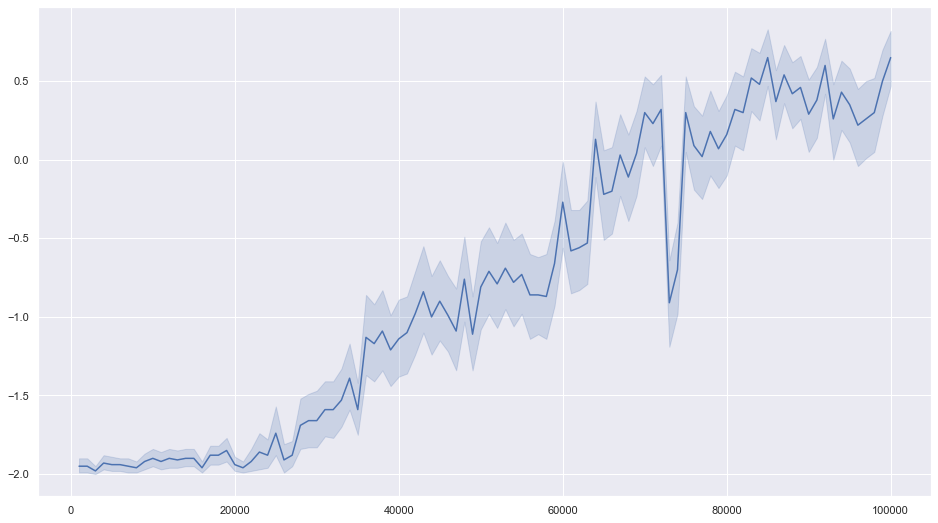

In [8]:
sns.lineplot(data[:,0], data[:,1])

C:\Users\menta\anaconda3\envs\Advanced_Deep_Learning_Models_and_Methods-Menta-Nisti\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

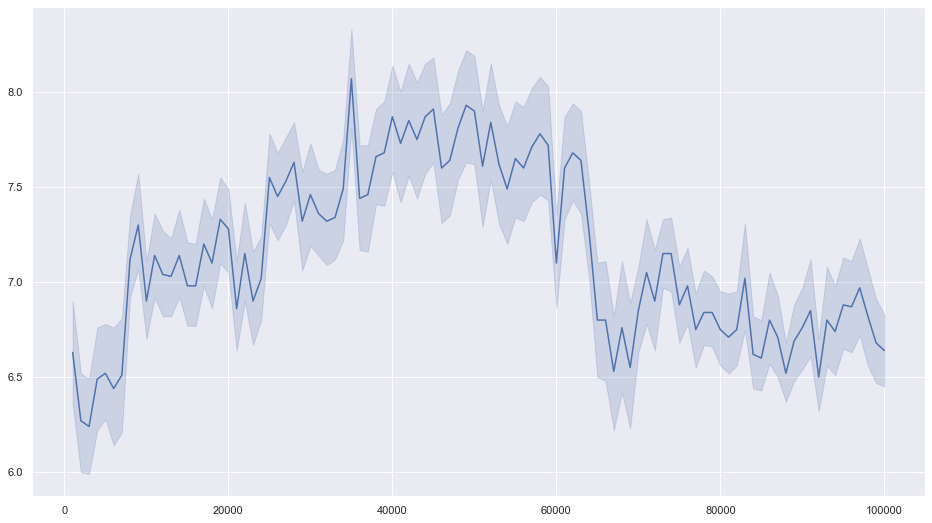

In [9]:
sns.lineplot(data[:,0], data[:,2])